<div style="border: 1px solid black; padding: 10px;">
<table>
<tr>
    <td width=20%>
        <br/> <a style="font-size: 16px; font-weight: italic">  Junior Data Scientist </a> <br/> <br/> Théo JEAN <br/>
    </td>
    <td width=60%>
        <center>
            <h1>Bank attrition analysis</h1>
            <h2> <font color='red'> What type of customer is likely to change bank?</font> </h2>
        </center>
    </td>
    <td width=20%>
        <a style="font-size: 16px; font-weight: bold"> Personal project 1 </a>
         <br/> 07/04/2024 <br/>
    </td>
</tr>
</table>
</div>

https://www.kaggle.com/datasets/manjuahuja/bank-churner

# Introduction : 

The aim of this project is to create a Machine Learning model to predict customer attrition in a bank. This notebook is structured in three main steps:

- **Exploratory Data Analysis:**

We'll start by displaying the overall characteristics of our portfolio of bank customers by performing descriptive statistics and graphical visualisations. This step will give us an overview of the data and enable us to draw some useful initial conclusions.

- **Data pre-processing:**

Next, we'll proceed to data pre-processing. This will include cleaning and transforming the data to make it suitable for model training. We will also display some intermediate results to help with the selection of relevant models and variables.

- **Model optimisation and prediction:**

Finally, we will proceed to optimize the model by adjusting its hyperparameters to maximize its performance. This stage will involve the evaluation of several cross-validation and model selection techniques. The aim is to develop a robust and accurate model to predict which customers are most likely to leave the bank, enabling the institution to better target its retention efforts.

Technically, we'll be looking to maximise the F1-score metric, thereby striking an optimal balance between precision and recall. This will help us minimise both false positives and false negatives, ensuring that our model correctly identifies customers likely to leave the bank, while reducing misclassification errors.

## Table of contents <a class="anchor" id="up"></a>

* [First overview of the dataset](#chapter0)
* [1. Exploratory Data Analysis (EDA)](#chapter1)
    * [1.1. Qualitative variables](#section_1_1)
    * [1.2. Quantitative variables](#section_1_2)
* [2. Preprocessing](#chapter2)
* [3. Modeling](#chapter3)
    * [3.1. Evaluation procedure](#section_3_1)
    * [3.2. Evaluation of pre-selected models](#section_3_2)
    * [3.3. Feature selection](#section_3_3)
* [4. Optimisation](#chapter4)
    * [4.1. XGBoost optimisation](#section_4_1)
    * [4.2. GradientBoosting optimisation](#section_4_2)
* [5. Analysis of misclassification errors](#chapter5)
* [6. Conclusion](#chapter6)

# First overview of the dataset : 

In [103]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, auc, accuracy_score, make_scorer, precision_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [104]:
# Importing dataset
df = pd.read_csv("BankChurners.csv", sep=",")

In [105]:
# Five first rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [106]:
# Deletion of last two columns not required for analysis
df = df.iloc[:, :-2] 

In [7]:
class DataSummary:
    """
    Classe de base pour résumer les données.
    """
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def summary(self):
        raise NotImplementedError("La méthode summary doit être implémentée par les sous-classes.")

    def format_summary(self, summary_df):
        lines = []
        headers = summary_df.columns
        column_widths = [max(len(str(row[col])) for row in summary_df.to_dict('records')) for col in headers]
        column_widths = [max(width, len(header)) for width, header in zip(column_widths, headers)]
        header_line = "| " + " | ".join(f"{col:<{width}}" for col, width in zip(headers, column_widths)) + " |"
        lines.append(header_line)
        lines.append('-' * len(header_line))
        for _, row in summary_df.iterrows():
            line = "| " + " | ".join(f"{str(row[col]):<{width}}" for col, width in zip(headers, column_widths)) + " |"
            lines.append(line)
        return "\n".join(lines)


class QuantitativeSummary(DataSummary):
    """
    Classe pour résumer les données quantitatives.
    """
    def summary(self):
        quanti_col = self.df.select_dtypes(include=['number'])
        summary = []

        for col in quanti_col.columns:
            unique_values = quanti_col[col].dropna().unique()
            missing_percentage = round(self.df[col].isna().mean() * 100, 2)
            min_value = quanti_col[col].min()
            max_value = quanti_col[col].max()
            mean_value = round(quanti_col[col].mean(), 2)
            std_value = round(np.std(quanti_col[col]), 2)
            median_value = round(quanti_col[col].median(), 2)
            summary.append({
                'Variable': col,
                'Type': quanti_col[col].dtype,
                'Missing %': f"{missing_percentage:.2f}%",
                'Mean': mean_value,
                'Median': median_value,
                'Std': std_value,
                'Min': min_value,
                'Max': max_value,
                'Unique Values (Top 5)': unique_values[:5]
            })

        return pd.DataFrame(summary)


class QualitativeSummary(DataSummary):
    """
    Classe pour résumer les données qualitatives.
    """
    def summary(self):
        quali_col = self.df.select_dtypes(exclude=['number'])
        summary = []

        for col in quali_col.columns:
            missing_percentage = round(self.df[col].isna().mean() * 100, 2)
            most_freq_value = quali_col[col].mode().iloc[0] if not quali_col[col].mode().empty else 'N/A'
            freq_distrib = quali_col[col].value_counts(normalize=True).to_dict()
            top_5_cat = ', '.join([f"{k} ({v:.2%})" for k, v in list(freq_distrib.items())[:5]])
            summary.append({
                'Variable': col,
                'Type': quali_col[col].dtype,
                'Missing %': f"{missing_percentage:.2f}%",
                'Most Frequent Value': most_freq_value,
                'Unique Values (Top 5)': top_5_cat
            })

        return pd.DataFrame(summary)


class Info:
    """
    Classe permettant un aperçu macro des données en affichant quelques statistiques descriptives
    des données numériques et catégorielles.
    """
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.quant_summary = QuantitativeSummary(df)
        self.qual_summary = QualitativeSummary(df)
        print("\nObjet Info créé")

    def display_summary(self):
        quanti_summary_df = self.quant_summary.summary()
        quali_summary_df = self.qual_summary.summary()

        print()
        print("Dataset of", len(self.df), "rows and", len(self.df.columns), "variables.")
        print()
        print("***" * 40)
        print()
        print("Quantitative Variables Summary:", len(quanti_summary_df))
        print(self.quant_summary.format_summary(quanti_summary_df))
        print()
        print("***" * 40)
        print()
        print("Qualitative Variables Summary:", len(quali_summary_df))
        print(self.qual_summary.format_summary(quali_summary_df))


In [8]:
info = Info(df)


Objet Info créé


In [18]:
info.display_summary()


Dataset of 10127 rows and 21 variables.

************************************************************************************************************************

Quantitative Variables Summary: 15
| Variable                 | Type    | Missing % | Mean         | Median      | Std         | Min         | Max         | Unique Values (Top 5)                               |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| CLIENTNUM                | int64   | 0.00%     | 739177606.33 | 717926358.0 | 36901961.36 | 708082083.0 | 828343083.0 | [768805383 818770008 713982108 769911858 709106358] |
| Customer_Age             | int64   | 0.00%     | 46.33        | 46.0        | 8.02        | 26.0        | 73.0        | [45 49 51 40 44]                                    |
| Dependent_count          | int64   | 0.00%     | 2.35         | 2.0         | 1.3         | 0.0

### **DESCRIPTION DES VARIABLES :**

`CLIENTNUM` : Identifiant unique du client.

`Attribution_Flag` **(Target)** : Indique si un client a quitté la banque (1) ou est resté (0).

`Customer_Age` : Age du client.

`Gender` : Sexe du client.

`Dependent_count` : Nombre de personnes à la charge financière du client.

`Education_level` : Niveau d'éducation du client.

`Marital_Status` : Situation maritale du client.

`Income_category` : Tranche de revenus du client.

`Card_Category` : Type de carte bancaire du client.

`Months_on_book` : Période en mois où le client est avec cette banque.

`Total_Relationship_Count` : Nombre total de produits détenus par le client.

`Months_Inactive_12_mon` : Nombre de mois inactifs au cours des 12 derniers mois.

`Contacts_Count_12_mon` : Nombre de contacts avec la banque au cours des 12 derniers mois.

`Credit_Limit` : Plafond bancaire du client.

`Total_Revolving_Bal`: Solde total du crédit renouvelable actuel du client.

`Avg_Open_To_Buy` : Moyenne sur les 12 derniers mois du montant qu'il restait à dépenser en fin de mois.

`Total_Amt_Chng_Q4_Q1` : Taux de changement relatif entre le quatrième trimestre (Q4) et le premier trimestre (Q1) en montant => (Q4-Q1)/Q1

`Total_Trans_Amt` : Moyenne du montant total des transactions (12 derniers mois).

`Total_Trans_Ct` : Moyenne du nombre total de transactions (12 derniers mois).

`Total_Ct_Chng_Q4_Q1` : Taux de changement relatif entre le quatrième trimestre (Q4) et le premier trimestre (Q1) en nombre => (Q4-Q1)/Q1

`Avg_Utilization_Ratio` : Ratio d'utilisation de la carte de crédit (par exemple, 0.2 signifie que le client utilise 20% du crédit disponible sur sa carte en moyenne)

---

**RESUME STATISTIQUES DESCRIPTIVES / PROFIL DES CLIENTS DE LA BANQUE :**

Profil démographique : 
- La majorité des clients ont un âge compris entre 41 et 52 ans, avec une médiane de 46 ans.
- La plupart des clients ont entre 1 et 3 personnes à charge, avec une médiane de 2.3.
- En moyenne, les clients sont clients depuis 36 mois, avec la plupart des clients ayant entre 31 et 40 mois d'ancienneté.

Engagement et relation avec la banque :

- Les clients détiennent en moyenne 3.8 produits bancaires.
- En moyenne, les clients ont été inactifs pendant 2.3 mois au cours des 12 derniers mois.
- Les clients ont eu en moyenne 2.5 contacts avec la banque au cours des 12 derniers mois.

Santé financière :

- La limite de crédit à la consommation en moyenne des clients se situe autour de 8600, avec une variation significative.
- La plupart des clients ont un solde renouvelable entre 360 et 1800.
- En moyenne, les clients ont un montant ouvert à l'achat entre 1300 et 9900.

Comportement financier :

- Le changement total du montant au cours du quatrième trimestre par rapport au premier trimestre est en moyenne de 0.76.
- La plupart des clients ont un montant total de transaction entre 2200 et 4700.
- En moyenne, les clients ont entre 45 et 81 transactions.

# 1. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter1"></a>
[Up](#up)
## 1.1. Qualitative variables: <a class="anchor" id="section_1_1"></a>

In [107]:
# Conversion de certaines colonnes en catégories
convert_col = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' ]

for col in convert_col:
    df[col] = df[col].astype('category')

In [10]:
# any duplicated obs verification 
df.duplicated().any() 

False

In [11]:
# Let's check for missing hidden values in categorical variables
for col in df.select_dtypes(include='category').columns:
    print(f'{col.ljust(30, "-")} : {df[col].unique()}')

Attrition_Flag---------------- : ['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']
Gender------------------------ : ['M', 'F']
Categories (2, object): ['F', 'M']
Education_Level--------------- : ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status---------------- : ['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category--------------- : ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category----------------- : ['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']


We can see that in `Education_Level`, `Marital_Status` and `Income_Category`, there are Unknown values

In [12]:
unknown_col = ['Education_Level', 'Marital_Status', 'Income_Category']

for col in unknown_col:
    print(f"{col} : {len(df[df[col] == 'Unknown'])}")
    print(round((df[col] == 'Unknown').mean() * 100, 2),'%')
    print('-----')

Education_Level : 1519
15.0 %
-----
Marital_Status : 749
7.4 %
-----
Income_Category : 1112
10.98 %
-----


On va utiliser des modèles qui puissent gérer les valeurs manquantes. On verra aussi dans les erreurs de mauvaise classement si les valeurs inconues ont joué un rôle dans la mauvaise prédiction.

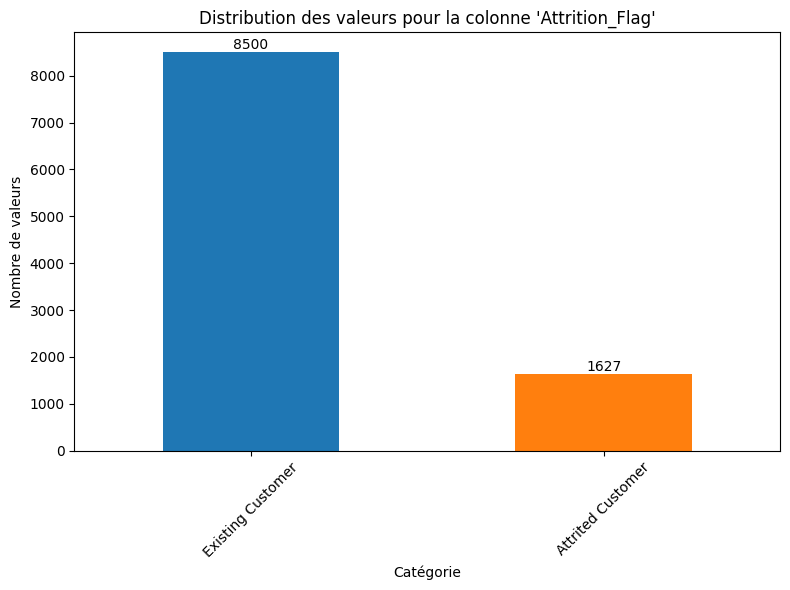

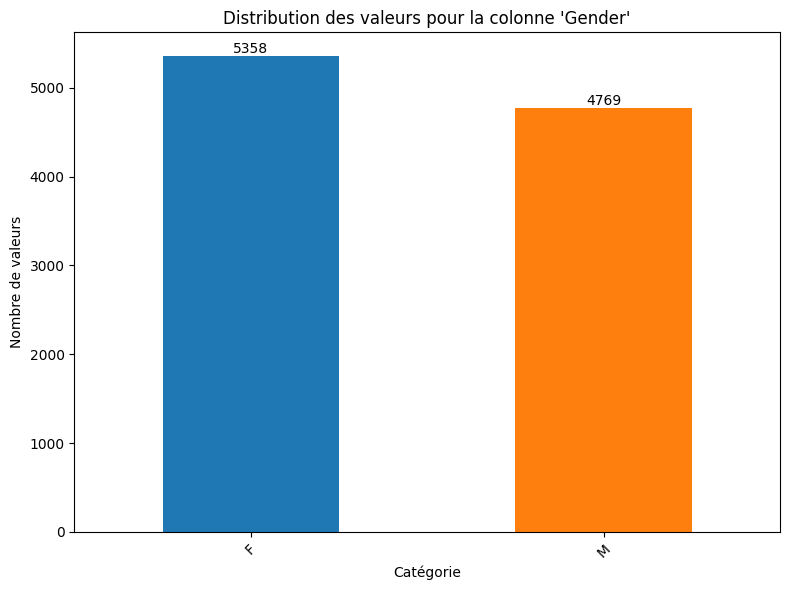

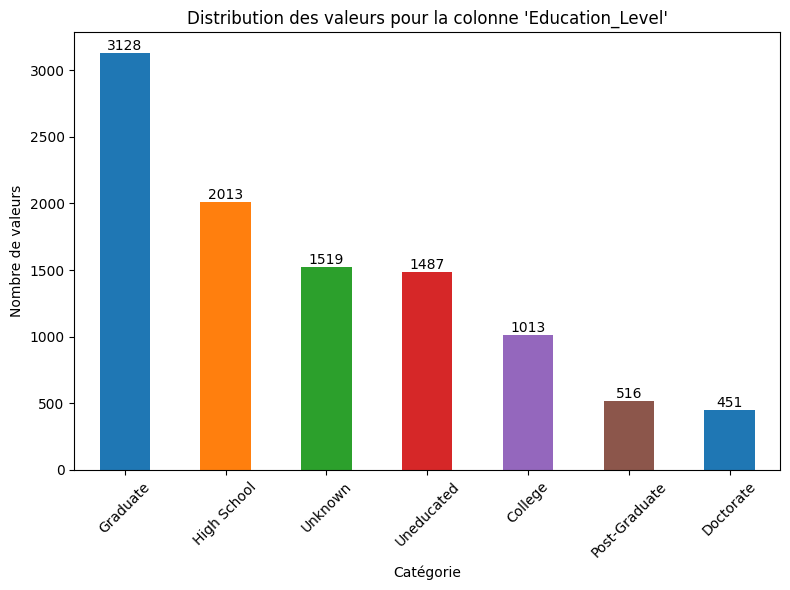

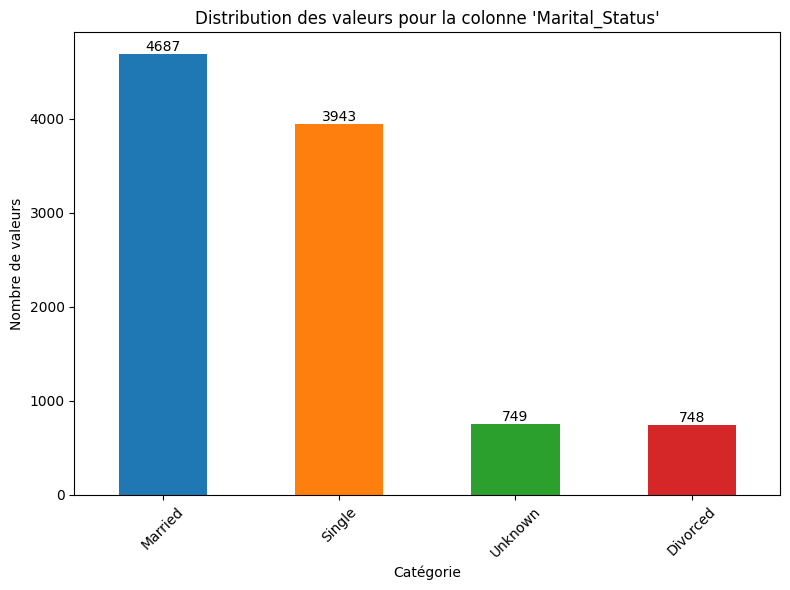

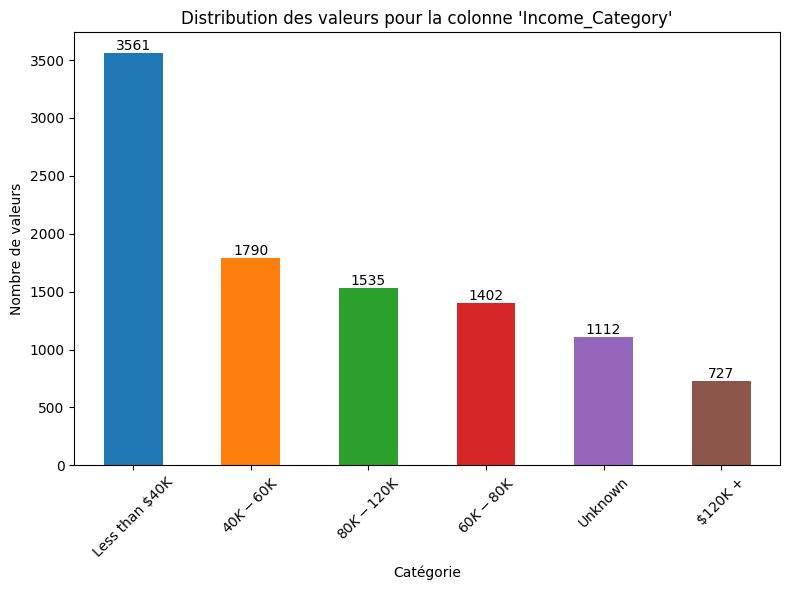

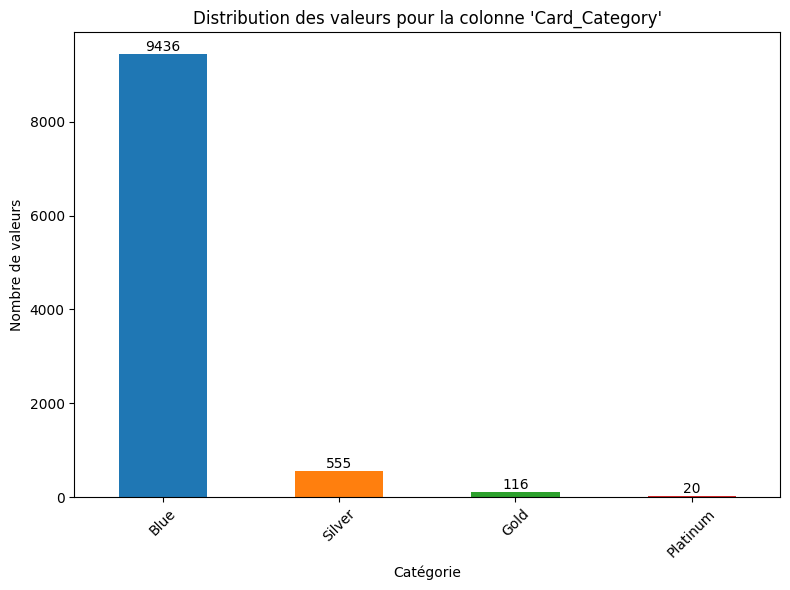

In [15]:
string_columns = df.select_dtypes(include=['category'])
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Itération sur les colonnes de type string et affichage des graphiques
for col in string_columns.columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color=custom_colors)

    # Ajout des nombres au-dessus de chaque barre
    for i, value in enumerate(df[col].value_counts()):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

    plt.title(f"Distribution des valeurs pour la colonne '{col}'")
    plt.xlabel('Catégorie')
    plt.ylabel('Nombre de valeurs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 1.2. Quantitative variables: <a class="anchor" id="section_1_2"></a>

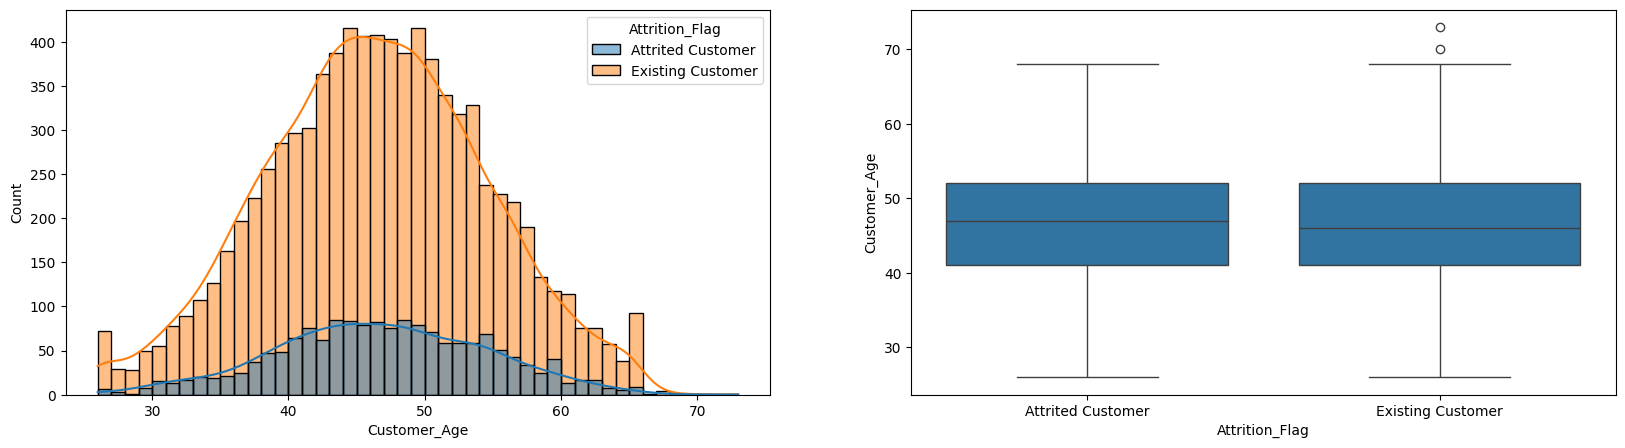

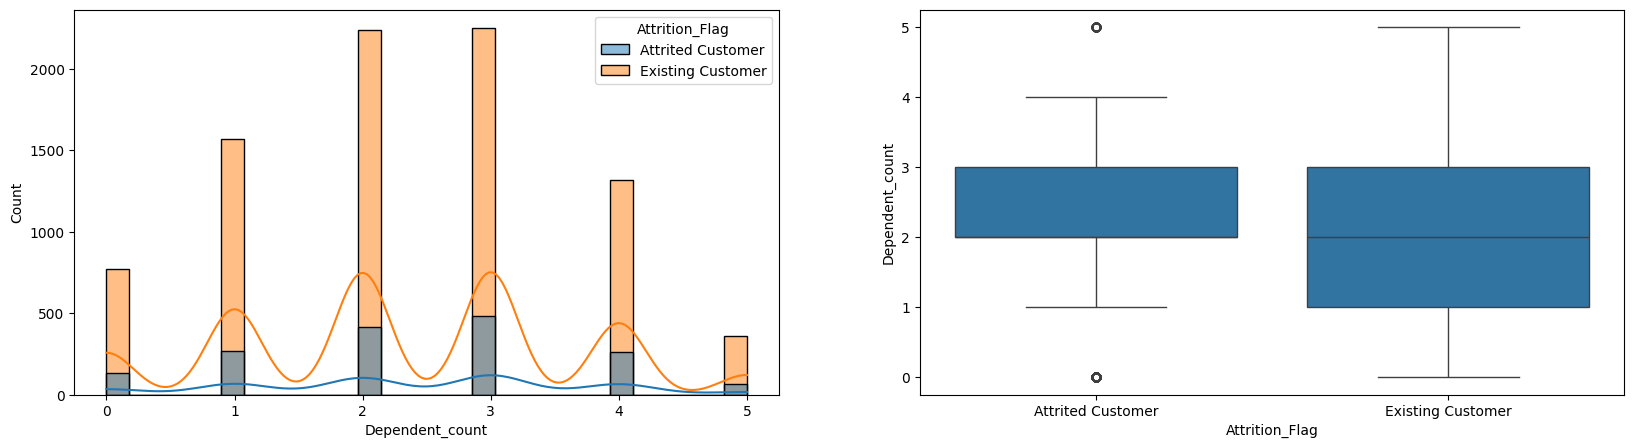

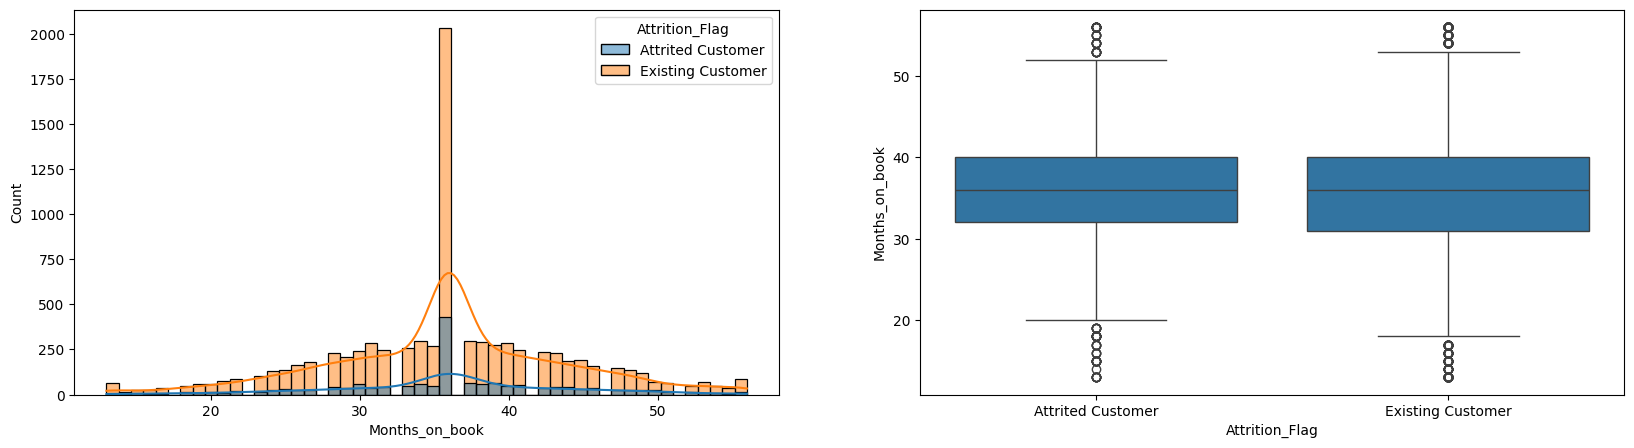

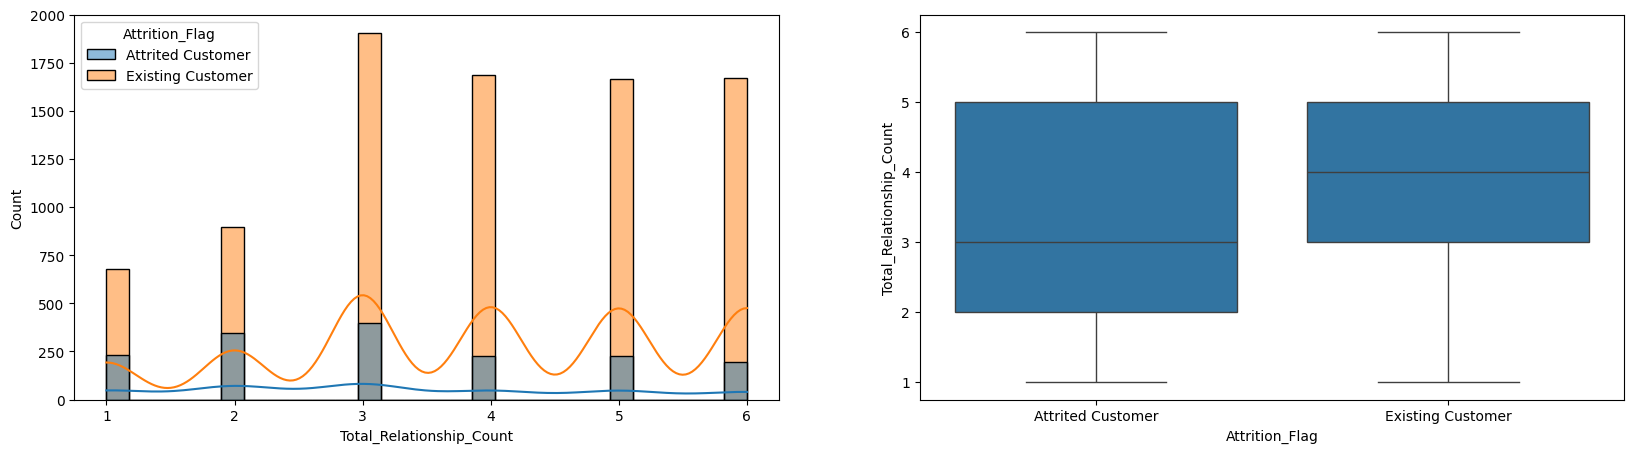

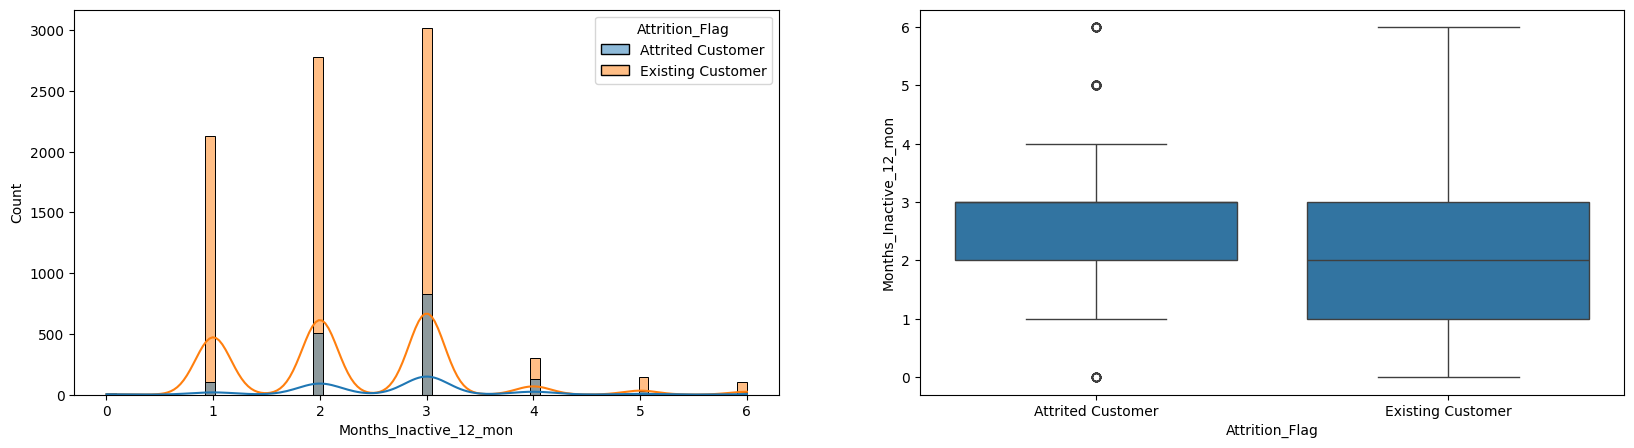

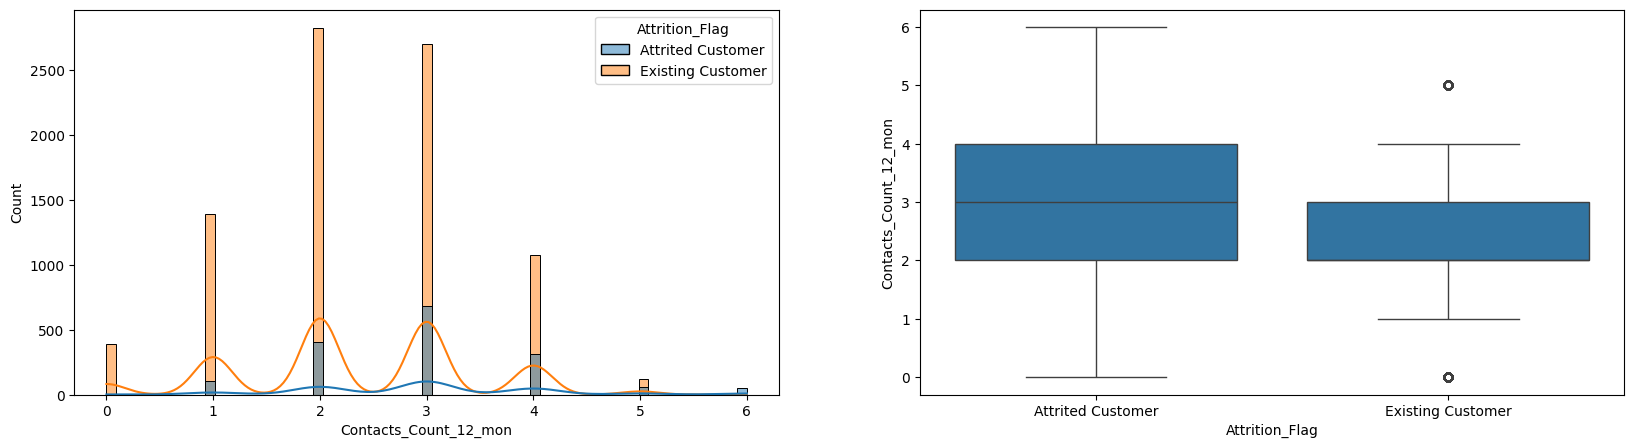

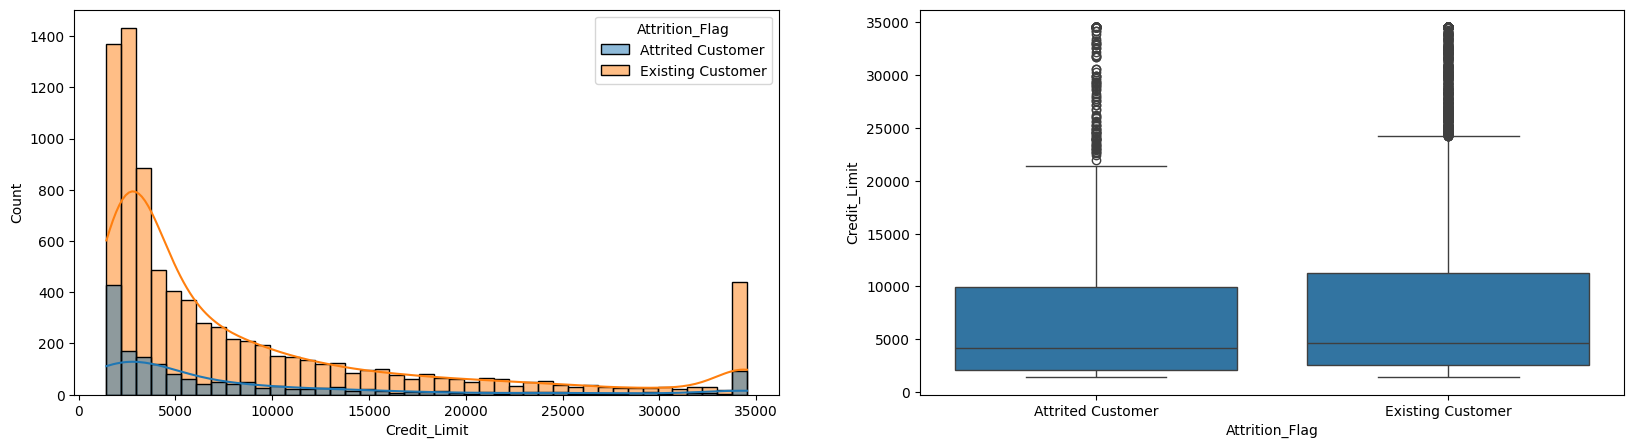

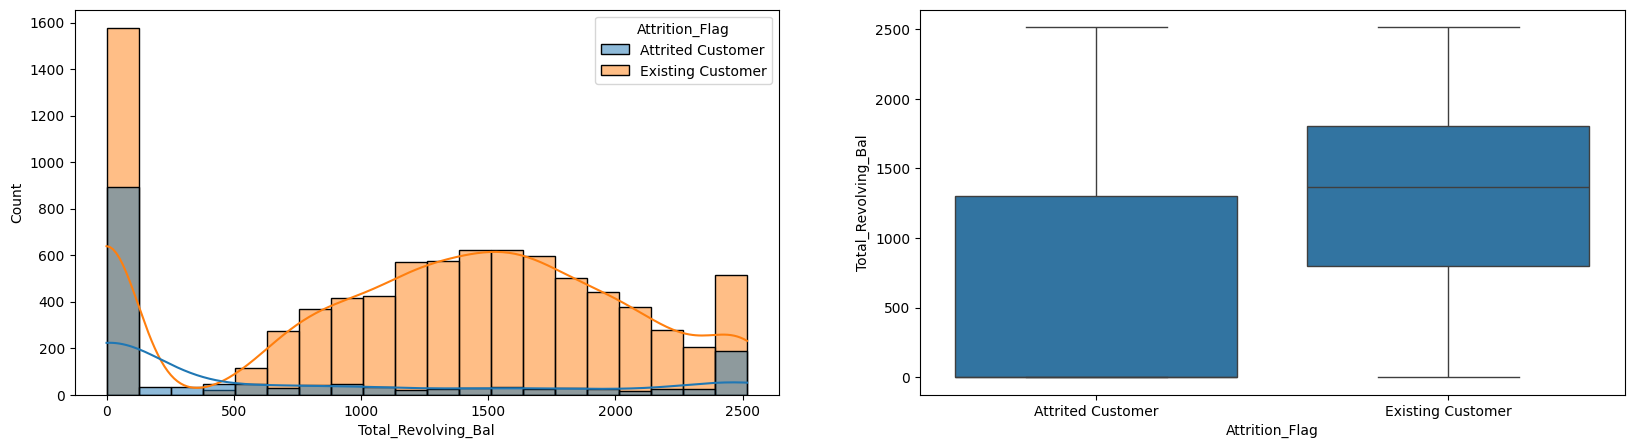

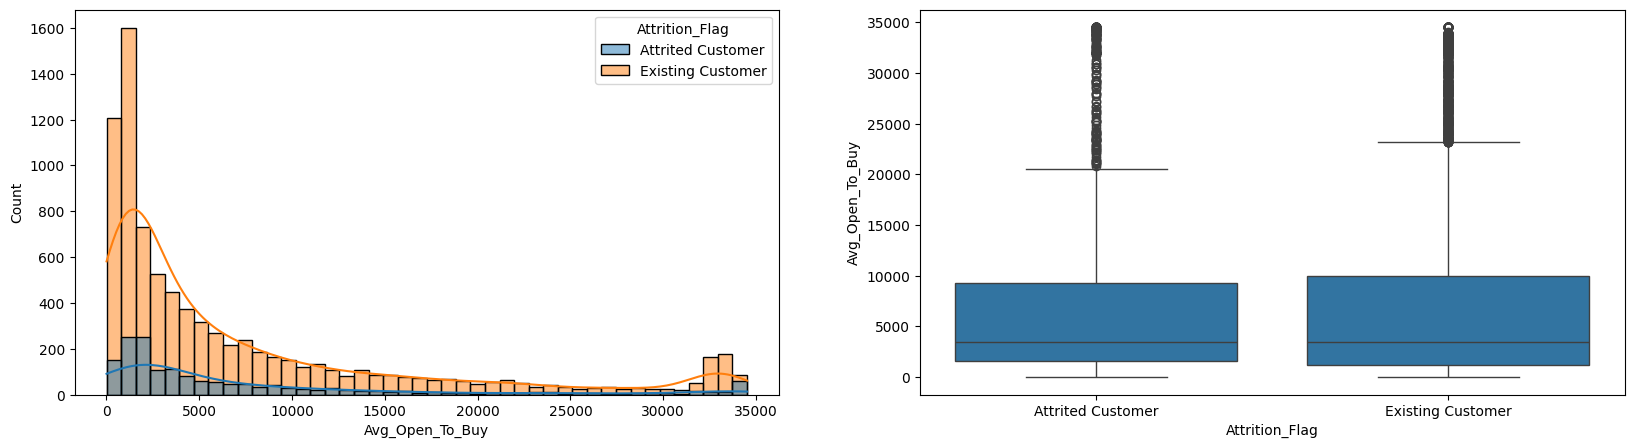

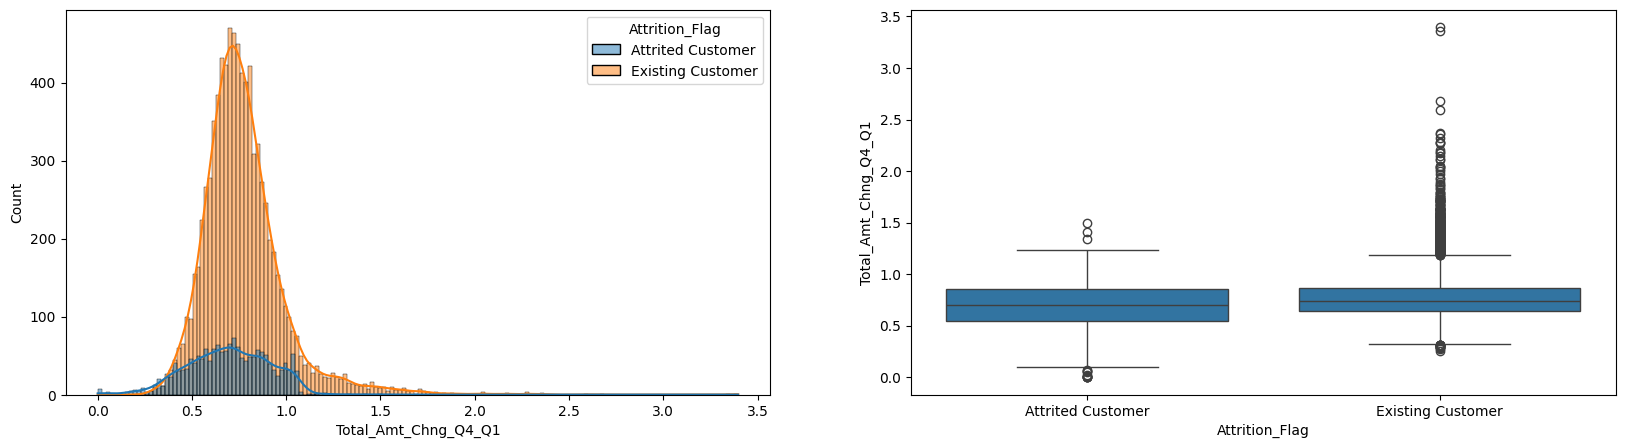

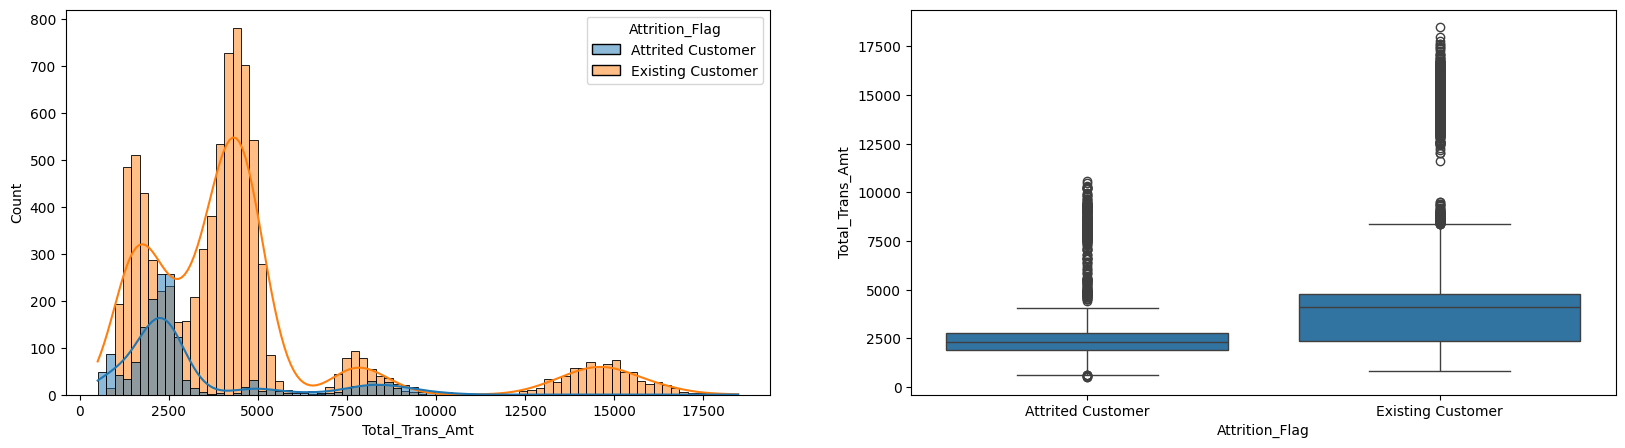

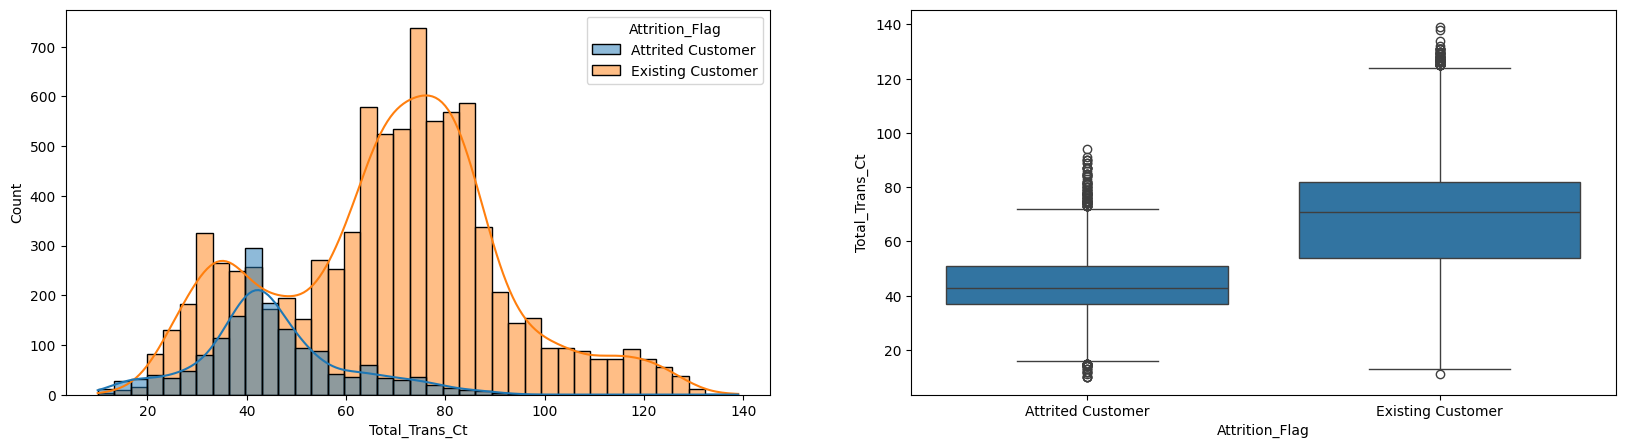

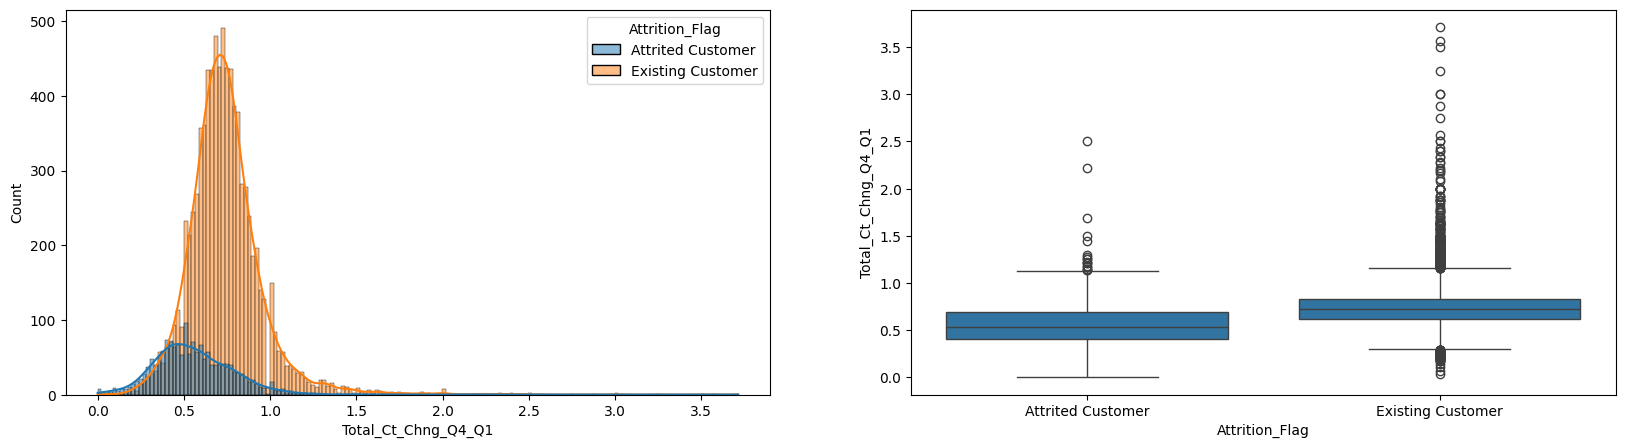

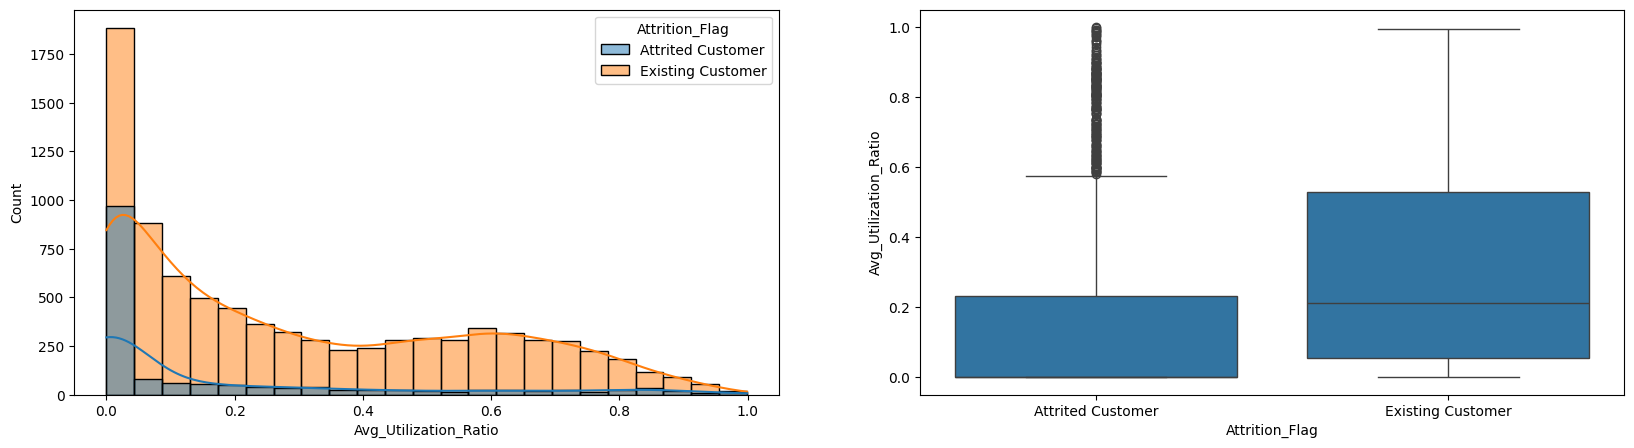

In [20]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

def plot_box(var):
    plt.subplot(1, 2, 1)  # Met le graphique à gauche de l'écran
    sns.histplot(data=df, x=var, hue='Attrition_Flag', kde=True)  # kde=True permet de mettre la densité
    
    plt.subplot(1, 2, 2)  # Met le graphique à droite de l'écran
    sns.boxplot(x='Attrition_Flag', y=var, data=df)
    
    plt.show()

for col in numeric_columns.columns:
    plt.figure(figsize=(20, 5))
    plot_box(col)

**Total_Revolving_Bal, Total_Trans_Ct et Avg_Utilization_Ratio semble être des variables intéressantes dans l'analyse de l'attrition**

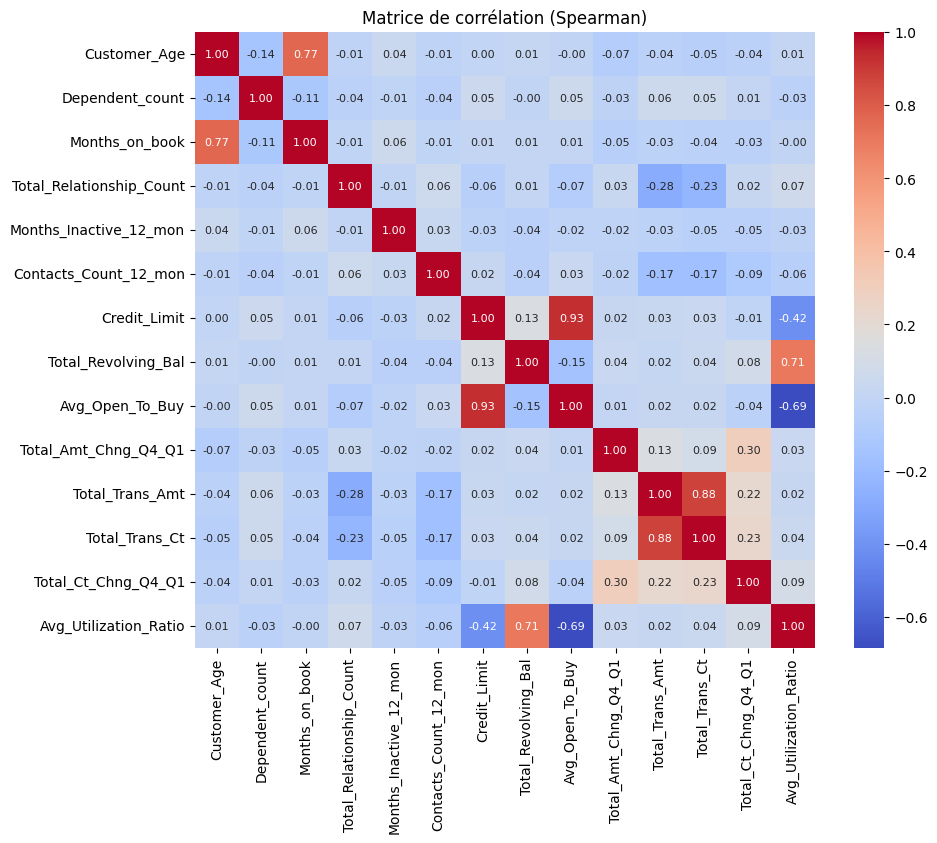

In [21]:
corr_matrix = numeric_columns.corr(method='spearman') 

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matrice de corrélation (Spearman)')
plt.show()

Grâce à cette représentation graphique on voit que certaines variables semblent corrélées entre elles :
* ***Month_on_book*** et ***Customer_Age*** => 0.77
* ***Total_Trans_Ct*** et ***Total_Trans_Amt*** => 0.88
* ***Total_Revolving_Bal*** et ***Avg_utilzation_Ratio*** => 0.71
* ***Avg_Open_To_Buy*** et ***Credit_Limit*** => 0.93

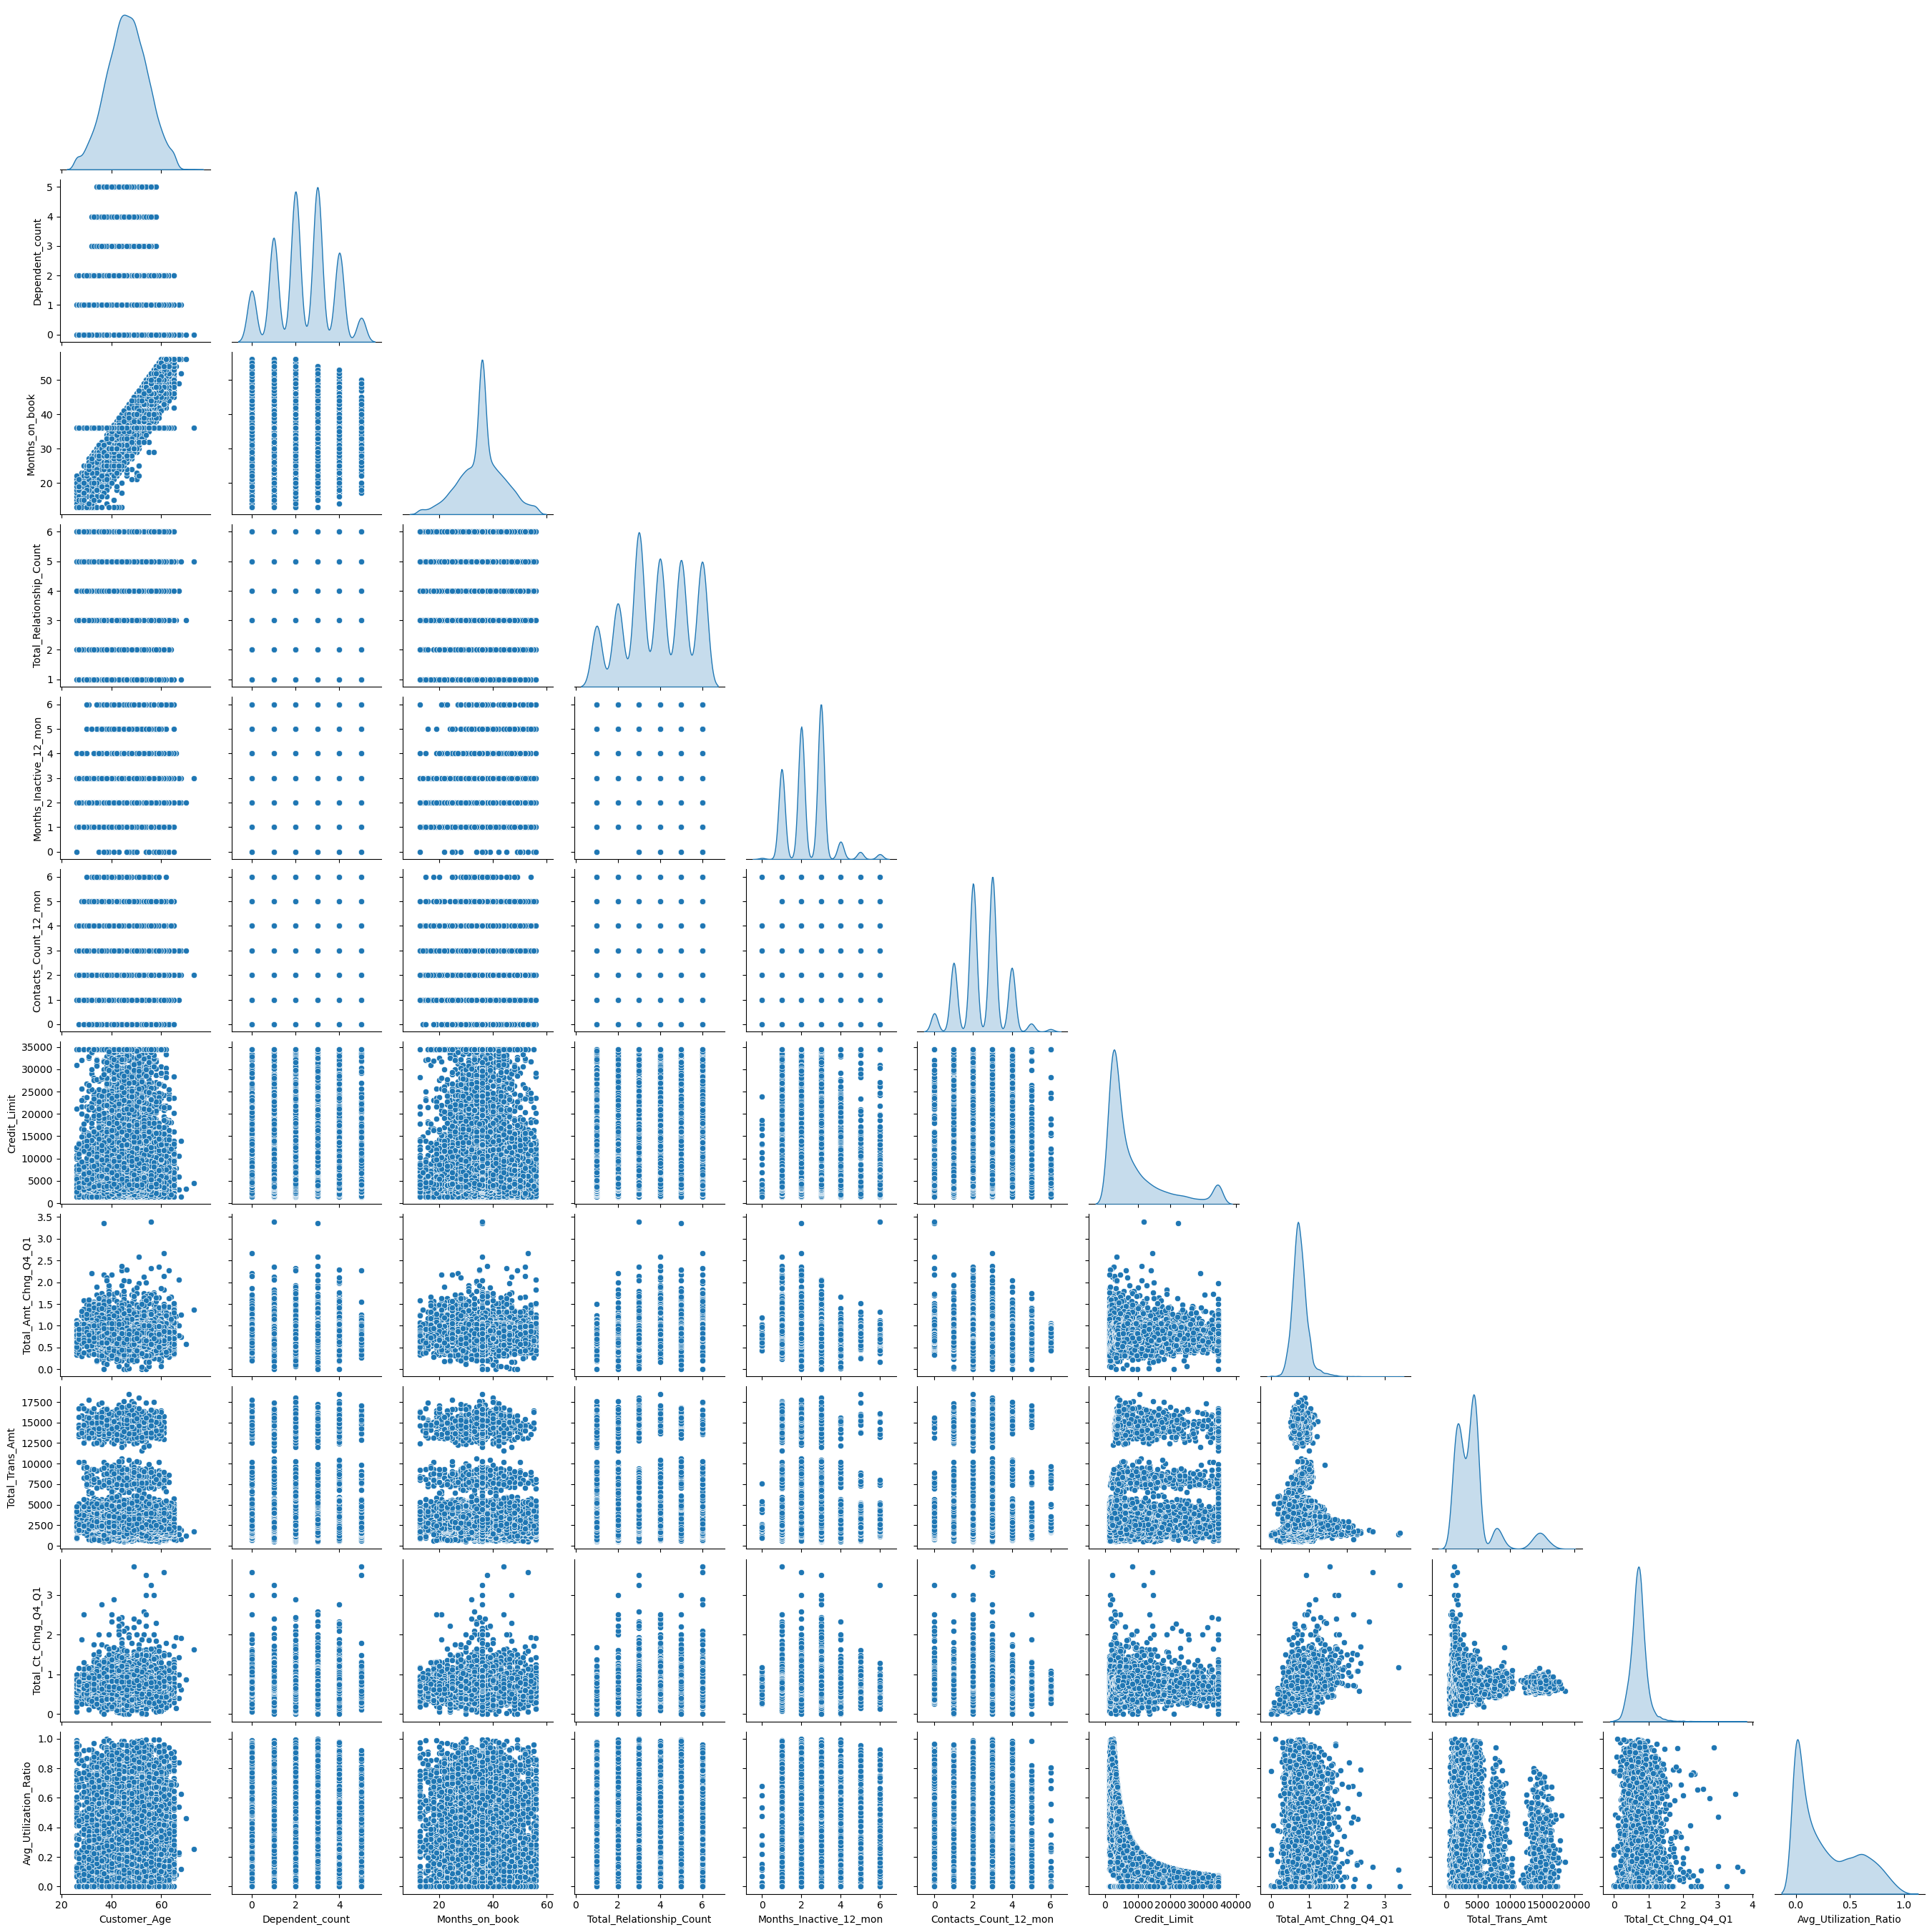

In [19]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numeric_columns, corner=True, diag_kind="kde")
plt.show()

On observe une relation linéaire entre `Month_On_Book` et `Customer_Age`. On verra plus tard si on supprimer une des deux variables

# 2. Preprocessing <a class="anchor" id="chapter2"></a>
[Up](#up)

In [108]:
from sklearn.utils import resample
from abc import ABC, abstractmethod

class DataSplitter:
    def __init__(self, df: pd.DataFrame, target: str):
        self.df = df
        self.target = target
        self.trainset = None
        self.testset = None

    def split_data(self, test_size=0.2, random_state=42):
        self.trainset, self.testset = train_test_split(self.df, test_size=test_size, random_state=random_state, stratify=self.df[self.target])
        return self.trainset, self.testset

class Preprocessor:
    def __init__(self, trainset: pd.DataFrame, testset: pd.DataFrame, target: str):
        self.trainset = trainset
        self.testset = testset
        self.target = target
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.preprocessor = None

    def split_features_target(self):
        self.X_train = self.trainset.drop(columns=[self.target])
        self.y_train = self.trainset[self.target]
        self.X_test = self.testset.drop(columns=[self.target])
        self.y_test = self.testset[self.target]
        return self.X_train, self.X_test, self.y_train, self.y_test

    def preprocess(self, numeric_features: list, categorical_features: list):
        cat_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        numeric_transformer = Pipeline(steps=[
            ('MinMAX', MinMaxScaler()), 
            ('quantil', QuantileTransformer())
        ])
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('MinMax_Q', numeric_transformer, numeric_features),
                ('OHE', cat_transformer, categorical_features)
            ],
            remainder='passthrough'
        )
        pipeline = Pipeline(steps=[('preprocessor', self.preprocessor)])
        self.X_train = pipeline.fit_transform(self.X_train)
        self.X_test = pipeline.transform(self.X_test)

        return self.X_train, self.X_test

    def get_feature_names(self):
        if self.preprocessor is None:
            raise ValueError("Preprocessor has not been applied. Please run preprocess method first.")
        
        feature_names = self.preprocessor.get_feature_names_out()

        return feature_names

class Balancer(ABC):
    def __init__(self, trainset: pd.DataFrame, target: str):
        self.trainset = trainset
        self.target = target

    @abstractmethod
    def balance(self, ratio=1.0):
        pass

class UnderSampler(Balancer):
    def balance(self, ratio=1.0):
        majority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmax()]
        minority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmin()]
        n_majority = int(len(minority_class) * ratio)
        majority_class_undersampled = resample(majority_class, replace=False, n_samples=n_majority, random_state=42)
        balanced_df = pd.concat([minority_class, majority_class_undersampled])
        return balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

class OverSampler(Balancer):
    def balance(self, ratio=1.0):
        majority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmax()]
        minority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmin()]
        n_minority = int(len(majority_class) * ratio)
        minority_class_oversampled = resample(minority_class, replace=True, n_samples=n_minority, random_state=42)
        balanced_df = pd.concat([majority_class, minority_class_oversampled])
        return balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [109]:
# Étape de découpage des données
target = 'Attrition_Flag'

splitter = DataSplitter(df, target)
trainset, testset = splitter.split_data()

In [110]:
print(trainset[target].value_counts(normalize=True))
print()
print(trainset[target].value_counts())

Attrition_Flag
Existing Customer    0.839279
Attrited Customer    0.160721
Name: proportion, dtype: float64

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64


In [111]:
# Étape de prétraitement
preprocessor = Preprocessor(trainset, testset, target) 
X_train, X_test, y_train, y_test = preprocessor.split_features_target()

In [112]:
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

X_train_trans, X_test_trans = preprocessor.preprocess(numeric_features=numeric_features, categorical_features=categorical_features)

In [113]:
X_train_trans.shape, X_test_trans.shape, y_train.shape, y_test.shape

((8101, 38), (2026, 38), (8101,), (2026,))

In [114]:
# Obtenir les noms des fonctionnalités
feature_names = preprocessor.get_feature_names()
feature_names

array(['MinMax_Q__CLIENTNUM', 'MinMax_Q__Customer_Age',
       'MinMax_Q__Dependent_count', 'MinMax_Q__Months_on_book',
       'MinMax_Q__Total_Relationship_Count',
       'MinMax_Q__Months_Inactive_12_mon',
       'MinMax_Q__Contacts_Count_12_mon', 'MinMax_Q__Credit_Limit',
       'MinMax_Q__Total_Revolving_Bal', 'MinMax_Q__Avg_Open_To_Buy',
       'MinMax_Q__Total_Amt_Chng_Q4_Q1', 'MinMax_Q__Total_Trans_Amt',
       'MinMax_Q__Total_Trans_Ct', 'MinMax_Q__Total_Ct_Chng_Q4_Q1',
       'MinMax_Q__Avg_Utilization_Ratio', 'OHE__Gender_F',
       'OHE__Gender_M', 'OHE__Education_Level_College',
       'OHE__Education_Level_Doctorate', 'OHE__Education_Level_Graduate',
       'OHE__Education_Level_High School',
       'OHE__Education_Level_Post-Graduate',
       'OHE__Education_Level_Uneducated', 'OHE__Education_Level_Unknown',
       'OHE__Marital_Status_Divorced', 'OHE__Marital_Status_Married',
       'OHE__Marital_Status_Single', 'OHE__Marital_Status_Unknown',
       'OHE__Income_Category

In [115]:
# Créé des dataframe intermédiaires pour avoir les colonnes transformées
X_train_trans_df = pd.DataFrame(X_train_trans, columns=feature_names).drop(["MinMax_Q__CLIENTNUM"], axis=1)
X_test_trans_df = pd.DataFrame(X_test_trans, columns=feature_names).drop(["MinMax_Q__CLIENTNUM"], axis=1)

In [116]:
X_train_trans = np.array(X_train_trans_df)
X_test_trans = np.array(X_test_trans_df)

y_train = y_train.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_test = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

In [117]:
X_train_trans.shape, X_test_trans.shape

((8101, 37), (2026, 37))

# 3. Modeling <a class="anchor" id="chapter3"></a>
[Up](#up)

## 3.1. Evaluation procedure : <a class="anchor" id="section_3_1"></a>

In [118]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve 
from sklearn.metrics import confusion_matrix, classification_report 
from collections import Counter
from sklearn.metrics import RocCurveDisplay

class ModelEvaluator:
    def __init__(self, models, X_train, y_train, X_test, y_test, cv_splits=3, sample_size=0.1):
        self.models = models
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.cv_splits = cv_splits
        self.sample_size = sample_size
        self.scores = {"precision": {}, "recall": {}, "f1": {}}
   
    def evaluate_models(self):
        # Use a sample of the training data if specified
        if self.sample_size < 1.0:
            self.X_train, self.y_train = resample(self.X_train, self.y_train,
                                                  n_samples=int(len(self.X_train) * self.sample_size),
                                                  random_state=42)
       
        for name, model in self.models.items():
            print(f"Evaluating {name}...")
            # Fit the model
            model.fit(self.X_train, self.y_train)
            # Cross-validate and collect scores
            precision_scores = cross_val_score(model, self.X_train, self.y_train,
                                               cv=self.cv_splits, scoring='precision', n_jobs=-1)
            recall_scores = cross_val_score(model, self.X_train, self.y_train,
                                            cv=self.cv_splits, scoring='recall', n_jobs=-1)
            f1_scores = cross_val_score(model, self.X_train, self.y_train,
                                        cv=self.cv_splits, scoring='f1', n_jobs=-1)
           
            self.scores["precision"][name] = precision_scores
            self.scores["recall"][name] = recall_scores
            self.scores["f1"][name] = f1_scores
           
            # Print classification report
            y_pred = model.predict(self.X_test)
            print(confusion_matrix(self.y_test, y_pred))
            print(classification_report(self.y_test, y_pred))
       
    def plot_results(self):
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
       
        # Plot precision scores
        axes[0].boxplot(self.scores["precision"].values(), labels=self.scores["precision"].keys())
        axes[0].set_title('Precision Scores')
        axes[0].set_ylabel('Score')
       
        # Plot recall scores
        axes[1].boxplot(self.scores["recall"].values(), labels=self.scores["recall"].keys())
        axes[1].set_title('Recall Scores')
        axes[1].set_ylabel('Score')
       
        # Plot f1 scores
        axes[2].boxplot(self.scores["f1"].values(), labels=self.scores["f1"].keys())
        axes[2].set_title('F1 Scores')
        axes[2].set_ylabel('Score')
       
        plt.tight_layout()
        plt.show()
 
class FeatureImportanceAnalyzer:
    def __init__(self, models, X_train):
        self.models = models
        self.X_train = X_train
        self.feature_importances = {model: {} for model in models.keys()}
   
    def analyze_feature_importance(self):
        for name, model in self.models.items():
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
            elif hasattr(model, 'coef_'):
                importances = model.coef_[0]
            else:
                continue
            sorted_indices = np.argsort(importances)[::-1]
            top_features = sorted_indices[:10]
            self.feature_importances[name] = {self.X_train.columns[i]: importances[i] for i in top_features}
       
    def plot_feature_importance(self):
        all_importances = Counter()
        for model, importances in self.feature_importances.items():
            for feature, importance in importances.items():
                all_importances[feature] += 1
       
        most_common_features = all_importances.most_common()
        feature_names = [item[0] for item in most_common_features]
        counts = [item[1] for item in most_common_features]
       
        plt.figure(figsize=(12, 8))
        plt.barh(feature_names, counts)
        plt.xlabel('Importance Count')
        plt.ylabel('Features')
        plt.title('Most Important Features Across Models')
        plt.gca().invert_yaxis()
        plt.show()
 
class ModelAnalyzer:
    def __init__(self, model, X_train, y_train, X_test, y_test):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
 
    def evaluation(self):
        self.model.fit(self.X_train, self.y_train)
        y_pred = self.model.predict(self.X_test)
 
        print(confusion_matrix(self.y_test, y_pred))
        print(classification_report(self.y_test, y_pred))
 
        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
        N, train_score, val_score = learning_curve(self.model, self.X_train, self.y_train,
                                                   cv=skf, scoring='precision',
                                                   train_sizes=np.linspace(0.1, 1, 10))
 
        plt.figure(figsize=(12, 8))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
        plt.xlabel('Training Size')
        plt.ylabel('Score')
        plt.title('Learning Curve')
        plt.show()
 
        y_probs = self.model.predict_proba(self.X_test)[:, 1]
        y_prob_train = self.model.predict_proba(self.X_train)[:, 1]
 
        roc1 = RocCurveDisplay.from_predictions(self.y_test, y_probs, name="Testset")
        RocCurveDisplay.from_predictions(self.y_train, y_prob_train, name="Trainset", ax=roc1.ax_)
 
        plt.show()
 
    def calculate_top_predictions(self, top_percent=20):
        y_probs = self.model.predict_proba(self.X_test)[:, 1]
        df_results = pd.DataFrame({'y_probs': y_probs, 'true': self.y_test})
        df_results = df_results.sort_values(by='y_probs', ascending=False)
        top_n = int(len(df_results) * top_percent / 100)
        top_pred = df_results.head(top_n)
        nb_true_pos = top_pred[top_pred['true'] == 1].shape[0]
        percent_true_pos = round(nb_true_pos / top_pred.shape[0] * 100, 2)
       
        print(f'Parmi les {top_percent}% de meilleures probabilités, {percent_true_pos}% de clients sont réellement partis')
        return top_pred
   
    def create_lift_table(self, num_segments=10):
        y_probs = self.model.predict_proba(self.X_test)[:, 1]
        data = pd.DataFrame({'y_true': self.y_test, 'y_probs': y_probs})
        data = data.sort_values(by='y_probs', ascending=False).reset_index(drop=True)
 
        data["rank"] = np.arange(1, len(data) + 1)
        data["segment"] = pd.qcut(data['rank'], num_segments, labels=False)
        data['y_true'] = data['y_true'].astype(int)
 
        lift_table = data.groupby('segment').agg({'y_true': ['sum', 'count']}).reset_index()
        lift_table.columns = ["segment", "sum_y_true", "count"]
 
        lift_table['cum_sub'] = lift_table['sum_y_true'].cumsum()
        lift_table["cum_pop"] = lift_table['count'].cumsum() / len(data)
 
        initial_point = pd.DataFrame({'segment': [-1], 'sum_y_true': [0], 'count': [0], 'cum_sub': [0], 'cum_pop': [0]})
        lift_table = pd.concat([initial_point, lift_table]).reset_index(drop=True)
 
        lift_table['perc_sub_capt_relatif'] = lift_table['cum_sub'] / lift_table['count'].cumsum()
        lift_table['perc_sub_capt'] = lift_table['cum_sub'] / data['y_true'].sum()
 
        plt.figure(figsize=(10, 6))
        x = lift_table["cum_pop"]
        y = lift_table["perc_sub_capt"]
       
        plt.plot(x, y, marker='o', label='Courbe lift')
        plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Aléatoire')
       
        plt.axvline(x=0.2, c='m', linestyle='--', label='20% population')
 
        # Find the index of the closest value to 0.2
        closest_index = (lift_table["cum_pop"] - 0.2).abs().idxmin()
        lift_20_pop = lift_table.iloc[closest_index]
        lift_20 = lift_20_pop["perc_sub_capt_relatif"] / lift_table["perc_sub_capt_relatif"].iloc[-1]
        plt.text(0.22, 0.5, f"Lift 20% = {lift_20:.2f}", color="m")
 
        plt.title('Courbe lift')
        plt.xlabel('% population')
        plt.ylabel('% souscripteurs capturés')
        plt.legend()
        plt.grid(True)
        plt.show()
           
        return lift_table

In [119]:
# Définir les modèles
models = {
    'GB': GradientBoostingClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42, n_jobs=-1),
    'Ada': AdaBoostClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
    }

In [120]:
# Évaluer les modèles
evaluator = ModelEvaluator(models, X_train_trans, y_train, X_test_trans, y_test, cv_splits=5, sample_size=1)
evaluator.evaluate_models()

Evaluating GB...
[[1679   22]
 [  49  276]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.85      0.89       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Evaluating XGB...
[[1677   24]
 [  33  292]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.90      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Evaluating Ada...
[[1665   36]
 [  48  277]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.88      0.85      0.87       325

    accuracy                           0.96     

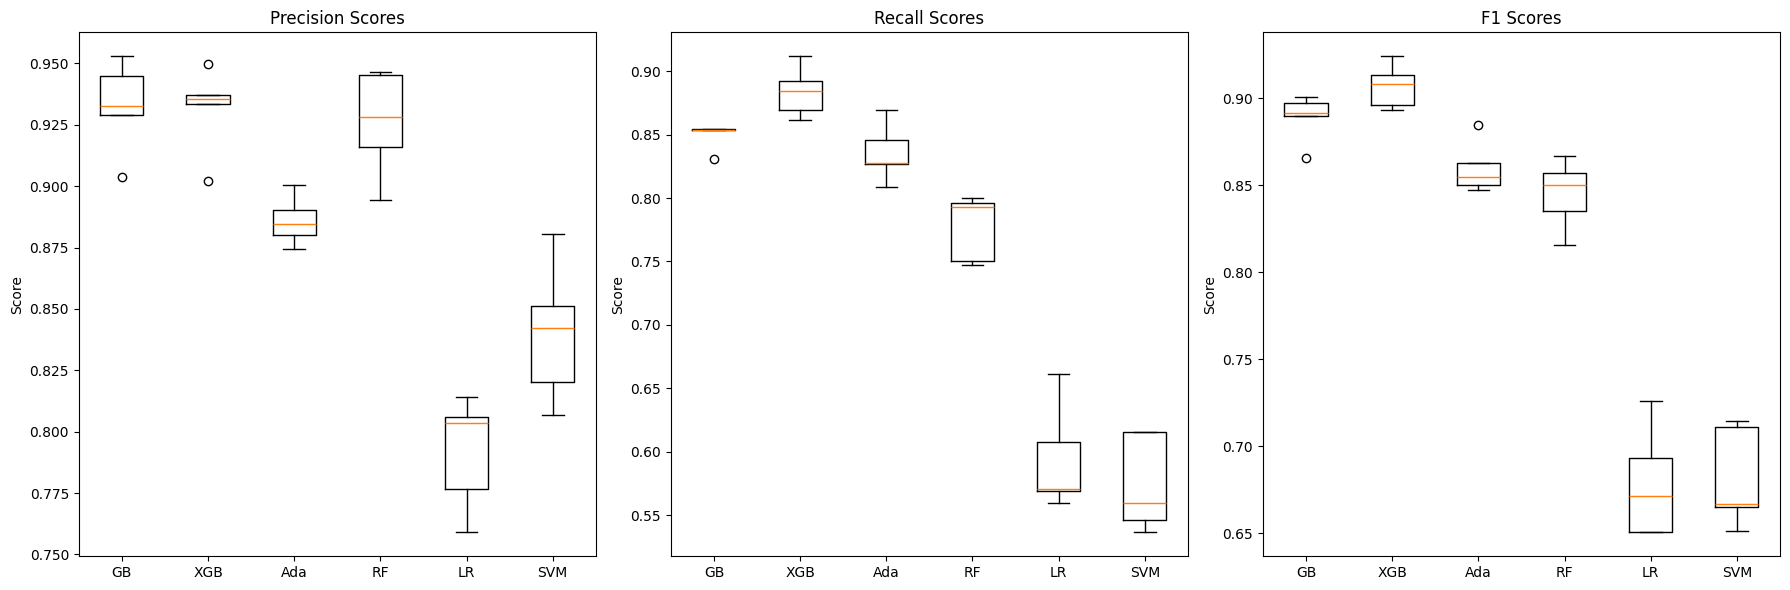

In [121]:
evaluator.plot_results()

A tester : XGBClassifier et GradientBoostingClassifier

In [62]:
# Analyser les importances des fonctionnalités 
analyzer = FeatureImportanceAnalyzer(models, X_train_trans_df)
analyzer.analyze_feature_importance()

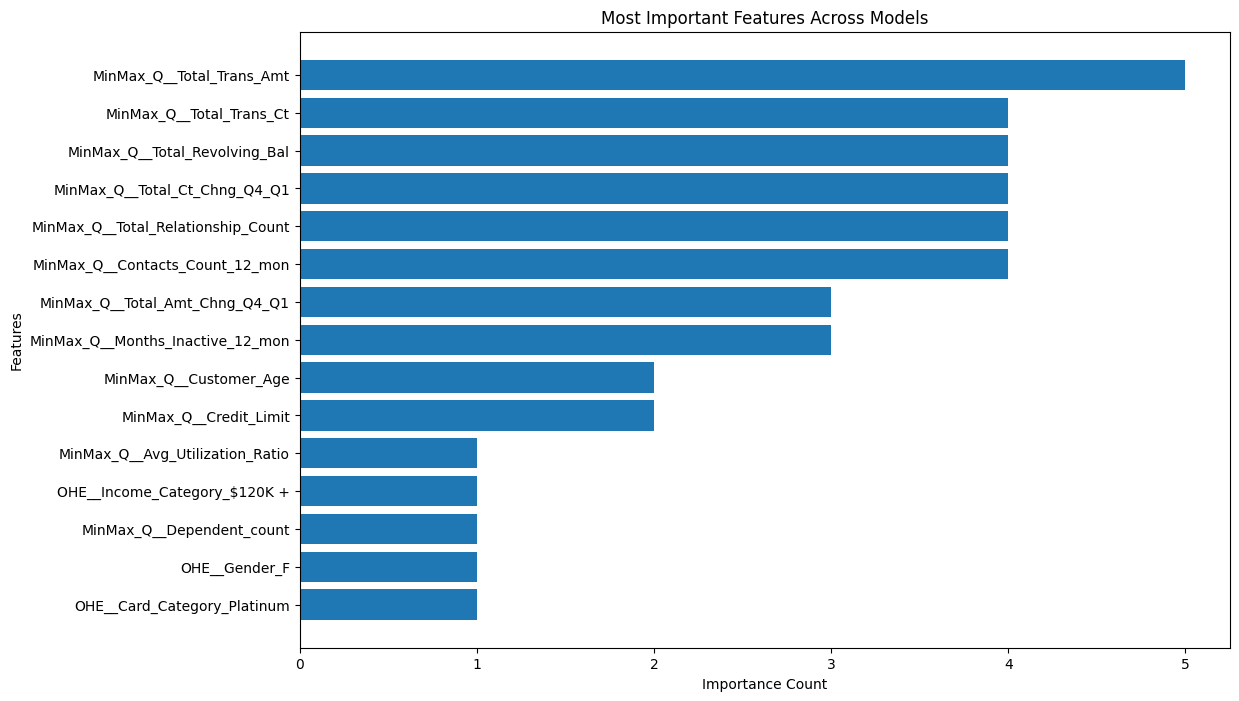

In [63]:
analyzer.plot_feature_importance()

## 3.2. Evaluation of pre-selected models <a class="anchor" id="section_3_2"></a>

[[1677   24]
 [  33  292]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.90      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



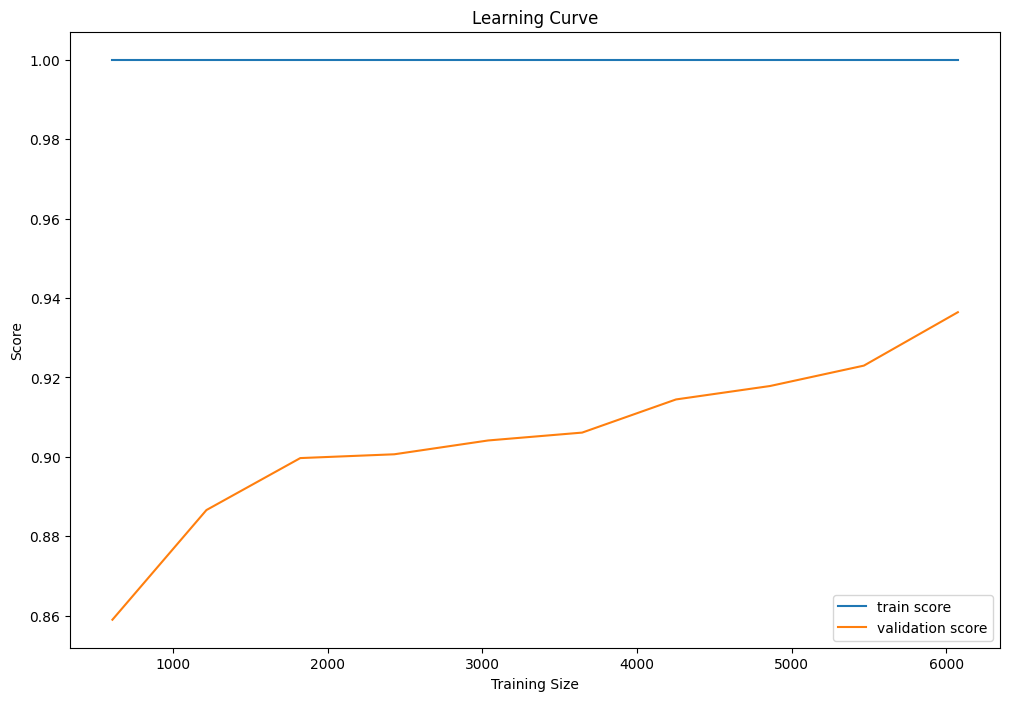

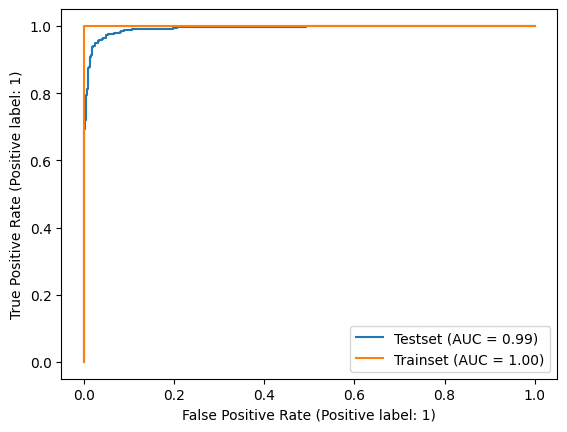

In [21]:
chosen_model = xgb.XGBClassifier(random_state=42, n_jobs=-1) 
model_analyzer = ModelAnalyzer(chosen_model, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

=> OverFitting mais bonnes perfs du validation score

[[1679   22]
 [  49  276]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.85      0.89       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



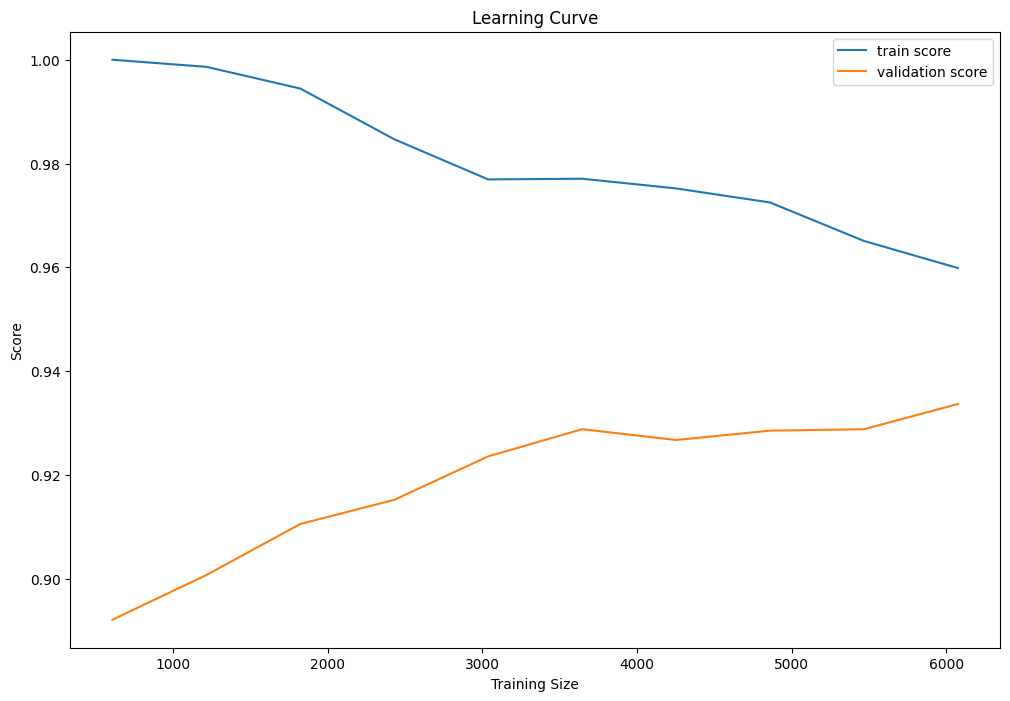

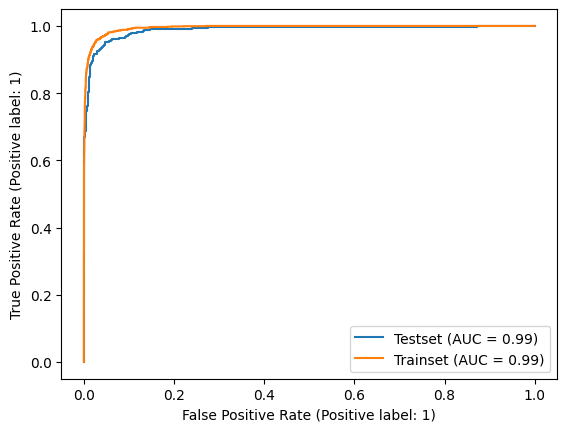

In [22]:
chosen_model2 = GradientBoostingClassifier(random_state=42) 
model_analyzer = ModelAnalyzer(chosen_model2, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

=> Bons résultats, peut être amélioré avec de meilleurs hyperparamètres

## 3.3. Nouveau modèle a partir des best features : <a class="anchor" id="section_3_3"></a>

In [31]:
cols = ["MinMax_Q__Contacts_Count_12_mon",
        "MinMax_Q__Total_Relationship_Count",
        "MinMax_Q__Total_Amt_Chng_Q4_Q1",
        "MinMax_Q__Total_Ct_Chng_Q4_Q1",
        "MinMax_Q__Total_Revolving_Bal",
        "MinMax_Q__Total_Trans_Ct",
        "MinMax_Q__Total_Trans_Amt",
        "MinMax_Q__Months_Inactive_12_mon",
        "MinMax_Q__Customer_Age"]

X_train_trans = X_train_trans_df[cols]
X_test_trans = X_test_trans_df[cols]

X_train_trans.shape, X_test_trans.shape, y_train.shape, y_test.shape

((8101, 9), (2026, 9), (8101,), (2026,))

[[1673   28]
 [  35  290]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.91      0.89      0.90       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



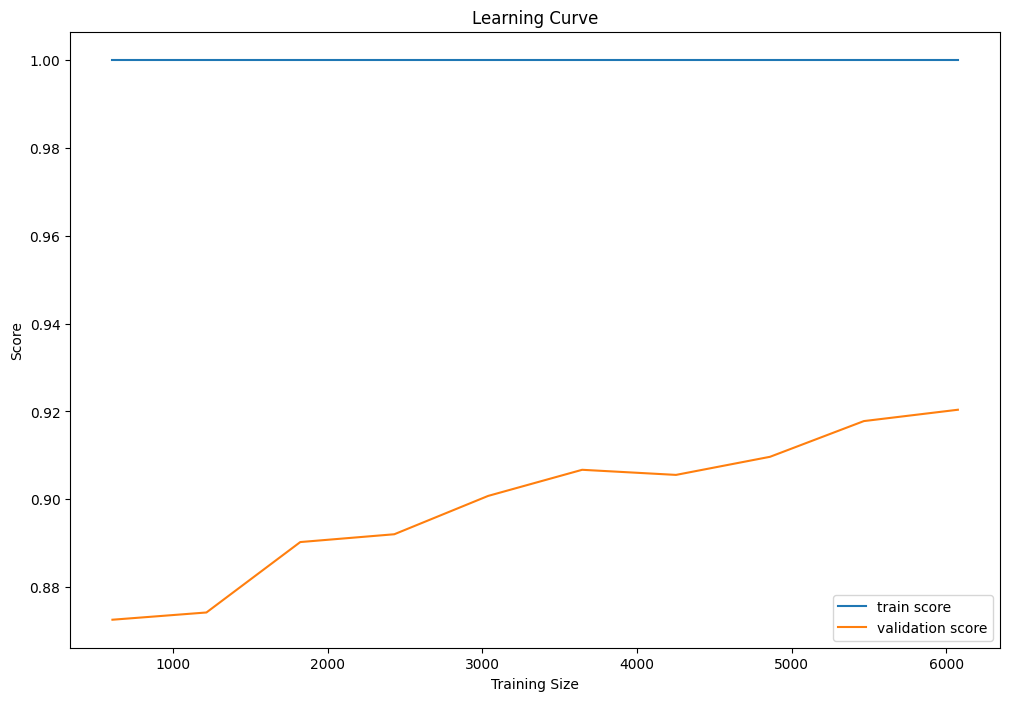

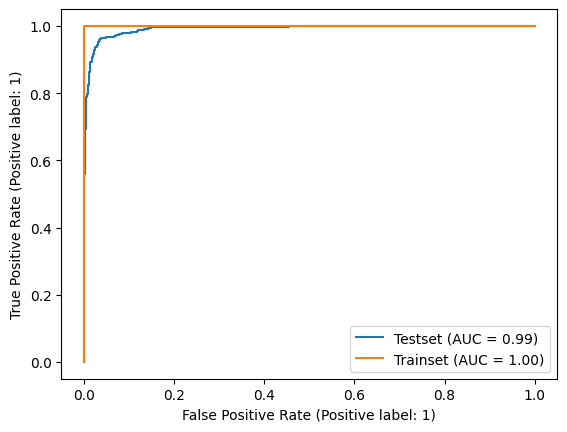

In [33]:
# Visualisation de XGB par défaut
xgb_default2 = xgb.XGBClassifier(n_jobs=-1, random_state=0)
model_analyzer = ModelAnalyzer(xgb_default2, X_train_trans, y_train, X_test_trans, y_test)

model_analyzer.evaluation()

=> Hyperparamètres à améliorer !

[[1678   23]
 [  49  276]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.92      0.85      0.88       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



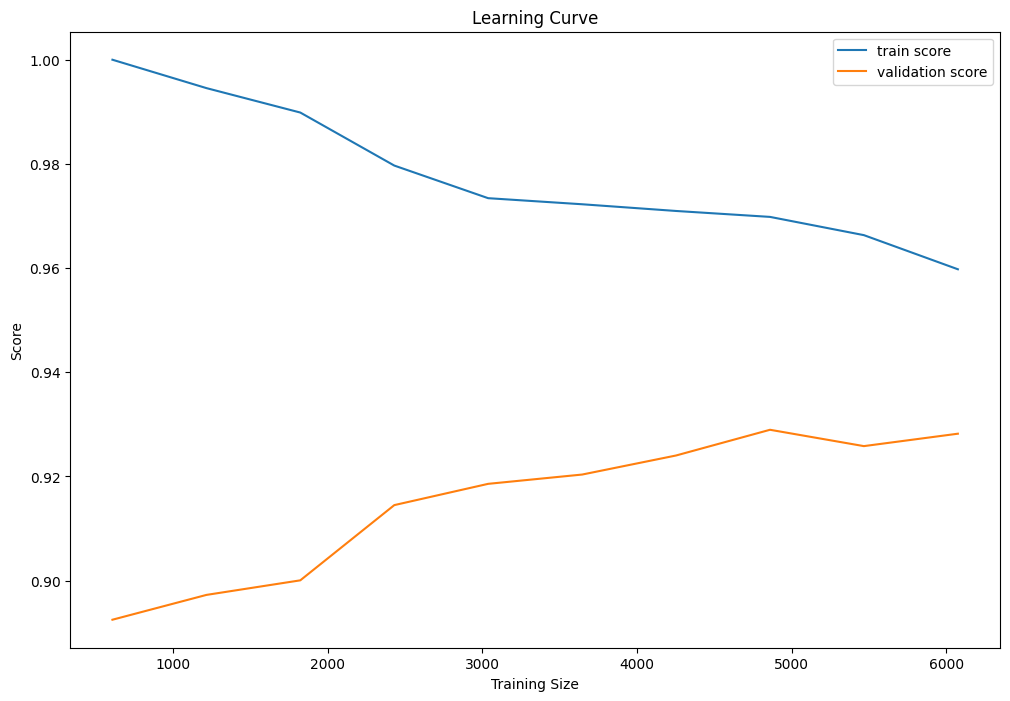

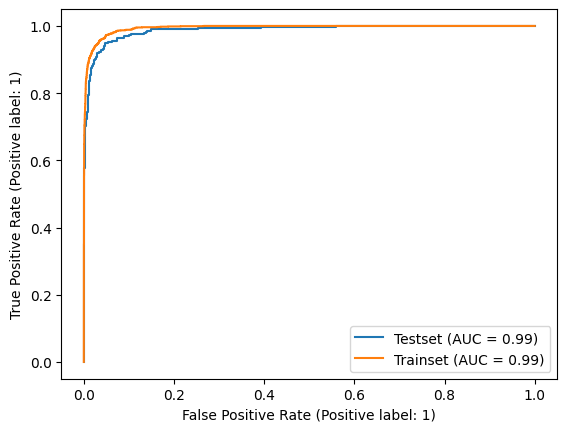

In [35]:
gb_default = GradientBoostingClassifier(random_state=42)
model_analyzer = ModelAnalyzer(gb_default, X_train_trans, y_train, X_test_trans, y_test)

model_analyzer.evaluation()

=> Performances quasiement similaires, cela montre que les autres variables n'apportent rien au modèle. On va garder ces variables pour gagner en temps de calculs

# 4. Optimisation <a class="anchor" id="chapter4"></a>
[Up](#up)

## 4.1. XGBoost optimisation <a class="anchor" id="section_4_1"></a>

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import optuna
from optuna.samplers import TPESampler

train_x, val_x, train_y, val_y = train_test_split(X_train_trans, y_train, train_size=0.7, random_state=1)

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 1, 3),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'seed': 42
    }

    model = xgb.XGBClassifier(**param)

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    fit_params = {
        'verbose': False,
        'eval_set': [(val_x, val_y)],
        'early_stopping_rounds': 10  
    }
    f1 = cross_val_score(model, X_train_trans, y_train, cv=skf, scoring=make_scorer(f1_score), fit_params=fit_params).mean()

    return f1


In [296]:
sampler = TPESampler(seed = 0) # Bayésien
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=200)

[I 2024-07-17 20:46:07,327] A new study created in memory with name: no-name-b97ccc3c-11cc-4211-9be1-3ffcba0dfb2f
[I 2024-07-17 20:46:09,095] Trial 0 finished with value: 0.8992992962361337 and parameters: {'max_depth': 2, 'learning_rate': 0.21740491624800165, 'n_estimators': 201, 'subsample': 0.7724415914984484, 'colsample_bytree': 0.7118273996694524, 'min_child_weight': 7, 'reg_alpha': 3.167361913032263e-05, 'reg_lambda': 0.13620216352659412}. Best is trial 0 with value: 0.8992992962361337.
[I 2024-07-17 20:46:11,905] Trial 1 finished with value: 0.8962820112227637 and parameters: {'max_depth': 3, 'learning_rate': 0.12119804045947552, 'n_estimators': 248, 'subsample': 0.7644474598764522, 'colsample_bytree': 0.7840222805469661, 'min_child_weight': 10, 'reg_alpha': 3.70073907377613e-08, 'reg_lambda': 4.9777650902423137e-08}. Best is trial 0 with value: 0.8992992962361337.
[I 2024-07-17 20:46:13,629] Trial 2 finished with value: 0.8660055768285269 and parameters: {'max_depth': 1, 'learn

In [297]:
print('Best trial:')
trial = study.best_trial
print('precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Best trial:
precision: 0.9142847935943259
Best hyperparameters: {'max_depth': 3, 'learning_rate': 0.10784525613941554, 'n_estimators': 274, 'subsample': 0.8766609655185922, 'colsample_bytree': 0.5559101287300079, 'min_child_weight': 2, 'reg_alpha': 1.148922089078765e-05, 'reg_lambda': 0.0002080925720941604}


In [298]:
best_params = trial.params 
xgb_opt = xgb.XGBClassifier(**best_params)

In [51]:
xgb_opt = xgb.XGBClassifier(max_depth= 3, learning_rate= 0.10784525613941554, n_estimators= 274, subsample= 0.8766609655185922, 
                            colsample_bytree= 0.5559101287300079, min_child_weight=2, reg_alpha= 1.148922089078765e-05, reg_lambda= 0.0002080925720941604, 
                            random_state=0, n_jobs=-1)

[[1676   25]
 [  30  295]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.91      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



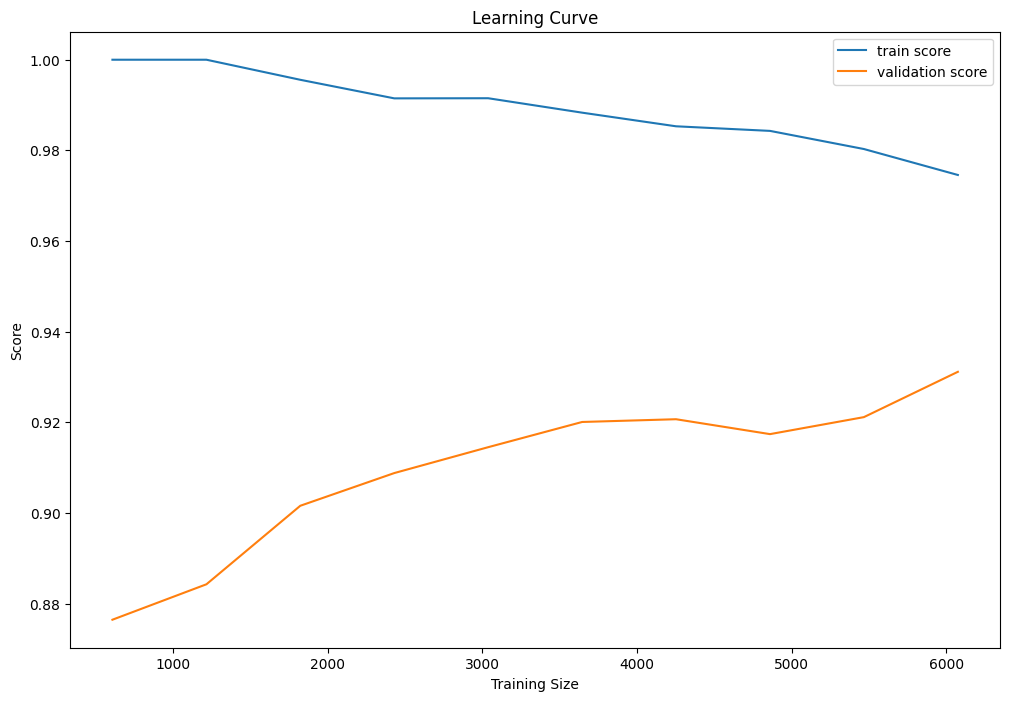

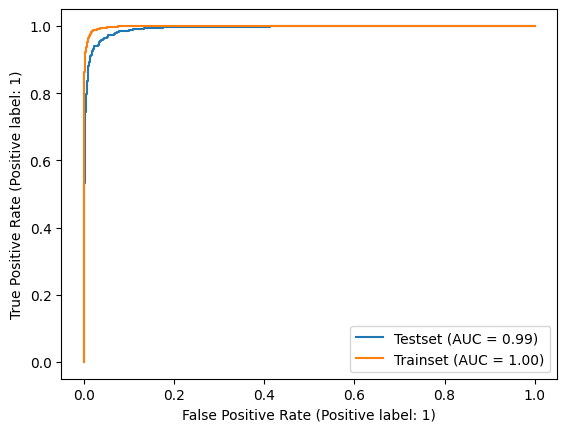

In [52]:
model_analyzer = ModelAnalyzer(xgb_opt, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

In [53]:
model_analyzer.calculate_top_predictions()

Parmi les 20% de meilleures probabilités, 77.53% de clients sont réellement partis


y_probs true
9602  0.999964    1
8379  0.999925    1
9898  0.999900    1
7133  0.999858    1
8558  0.999852    1
...        ...  ...
3934  0.174008    0
9717  0.171442    1
2601  0.171364    0
8878  0.171340    0
409   0.170275    0

[405 rows x 2 columns]

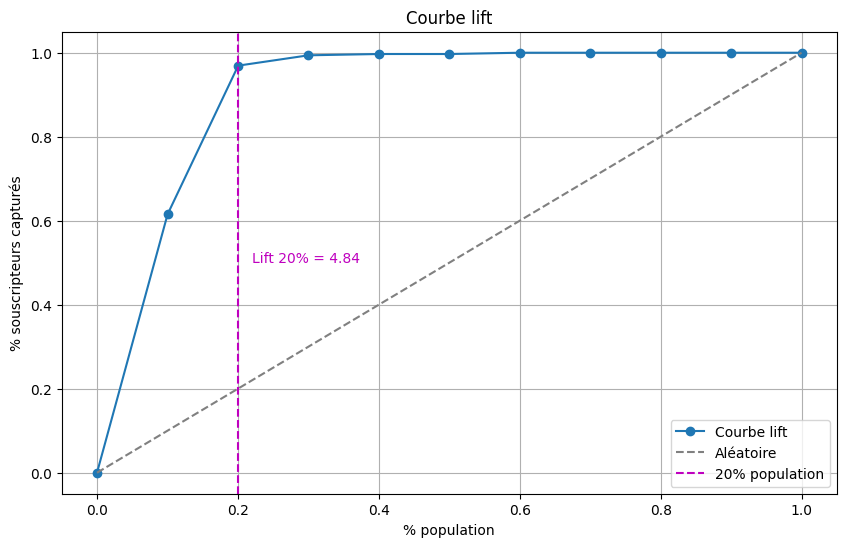

segment  sum_y_true  count  cum_sub   cum_pop  perc_sub_capt_relatif  \
0        -1           0      0        0  0.000000                    NaN   
1         0         200    203      200  0.100197               0.985222   
2         1         115    203      315  0.200395               0.775862   
3         2           8    202      323  0.300099               0.531250   
4         3           1    203      324  0.400296               0.399507   
5         4           0    202      324  0.500000               0.319842   
6         5           1    203      325  0.600197               0.267270   
7         6           0    202      325  0.699901               0.229196   
8         7           0    203      325  0.800099               0.200494   
9         8           0    202      325  0.899803               0.178278   
10        9           0    203      325  1.000000               0.160415   

    perc_sub_capt  
0        0.000000  
1        0.615385  
2        0.969231  
3        0.993846  
4        0.996923  
5        0.996923  
6        1.000000  
7        1.000000  
8        1.000000  
9        1.000000  
10       1.000000

In [54]:
model_analyzer.create_lift_table()

In [244]:
from joblib import dump, load

dump(xgb_opt, 'XGB_F191.pkl')

['XGB_F191.pkl']

### Résultats :

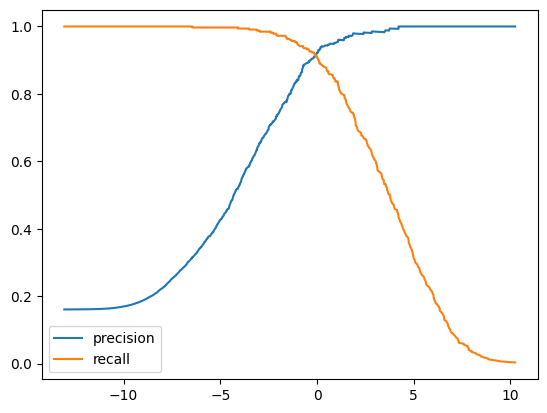

In [55]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, xgb_opt.predict(X_test_trans, output_margin=True))

plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [56]:
def model_final(model, X_test_trans, threshold=0):
    return model.predict(X_test_trans, output_margin=True) > threshold

In [57]:
y_pred_xgb = model_final(xgb_opt, X_test_trans, threshold=-0.6)

In [58]:
f1_score(y_true=y_test, y_pred=y_pred_xgb)

0.9129129129129129

## 4.2. GradientBoosting optimisation: <a class="anchor" id="section_4_2"></a>

In [131]:
def objective(trial):
    param = {
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 0
    }

    model = GradientBoostingClassifier(**param)

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    f1 = cross_val_score(model, X_train_trans, y_train, cv=skf, scoring=make_scorer(f1_score)).mean()

    return f1

In [132]:
sampler = TPESampler(seed = 0) # Bayésien
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2024-07-18 09:27:41,174] A new study created in memory with name: no-name-4e2e6704-9a10-4cdc-a5b5-2ca115c31e43
[I 2024-07-18 09:27:45,240] Trial 0 finished with value: 0.47219678369161056 and parameters: {'loss': 'exponential', 'learning_rate': 0.18480137906077673, 'n_estimators': 186, 'subsample': 0.7118273996694524, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.48183138025051464, 'max_features': 'log2'}. Best is trial 0 with value: 0.47219678369161056.
[I 2024-07-18 09:27:46,671] Trial 1 finished with value: 0.5535783135691981 and parameters: {'loss': 'exponential', 'learning_rate': 0.2784230251048717, 'n_estimators': 67, 'subsample': 0.5435646498507704, 'max_depth': 1, 'min_samples_split': 17, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.4350060741234096, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5535783135691981.
[I 2024-07-18 09:27:53,336] Trial 2 finished with value: 0.8043038182519469 and parameters: {'loss'

In [133]:
print('Best trial:')
trial_2 = study.best_trial
print('precision: {}'.format(trial_2.value))
print("Best hyperparameters: {}".format(trial_2.params))

Best trial:
precision: 0.9081884850675825
Best hyperparameters: {'loss': 'log_loss', 'learning_rate': 0.11172350498446691, 'n_estimators': 291, 'subsample': 0.6436757617324871, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 9.346034371258841e-05, 'max_features': 'sqrt'}


In [69]:
gb_opt = GradientBoostingClassifier(loss= 'log_loss', learning_rate= 0.11172350498446691, n_estimators= 291, subsample= 0.6436757617324871, max_depth= 3, 
                                    min_samples_split= 9, min_samples_leaf= 3, min_weight_fraction_leaf= 9.346034371258841e-05, max_features= 'sqrt',
                                    random_state=2)

In [134]:
best_params = trial_2.params 
gb_opt = GradientBoostingClassifier(**best_params)

[[1678   23]
 [  34  291]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.90      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



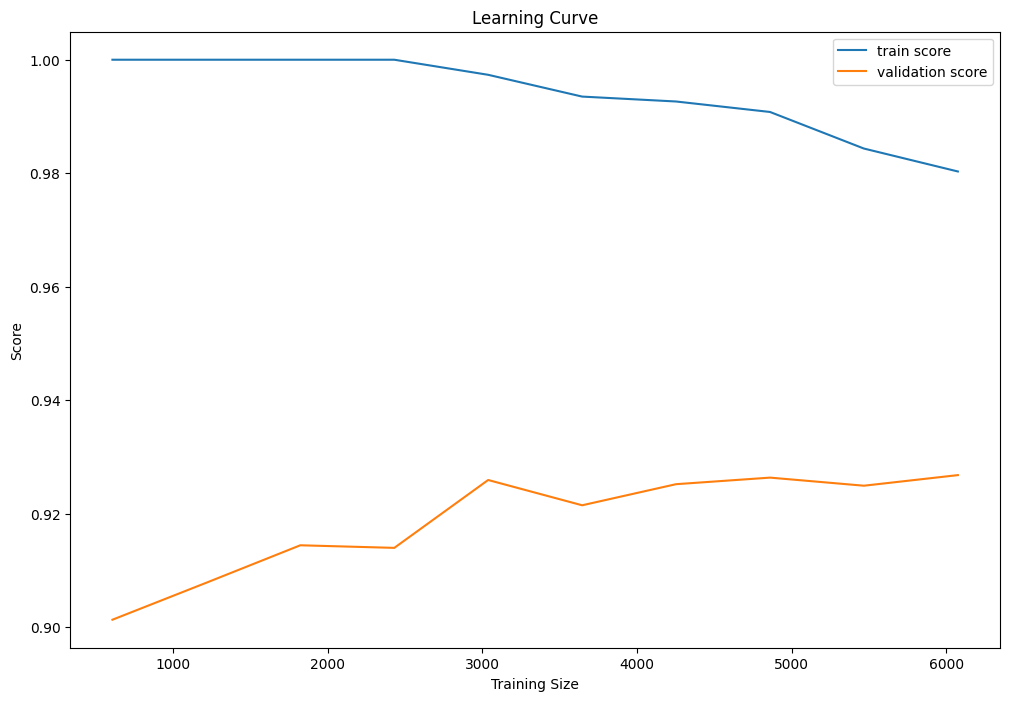

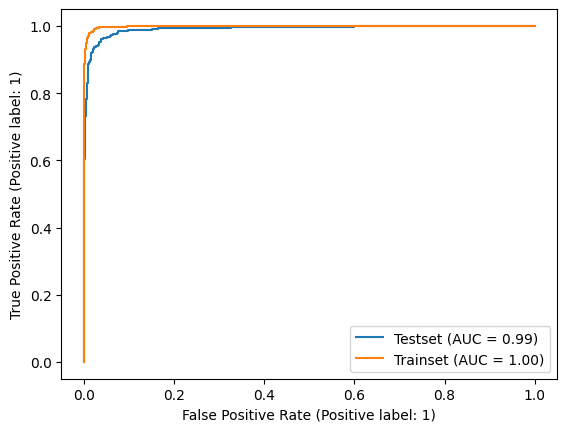

In [70]:
model_analyzer = ModelAnalyzer(gb_opt, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

In [71]:
model_analyzer.calculate_top_predictions()

Parmi les 20% de meilleures probabilités, 77.53% de clients sont réellement partis


y_probs true
8379  0.999976    1
9898  0.999953    1
9602  0.999921    1
7133  0.999894    1
7953  0.999866    1
...        ...  ...
3934  0.125171    0
8980  0.123884    0
2288  0.122594    0
994   0.121473    0
2160  0.120105    0

[405 rows x 2 columns]

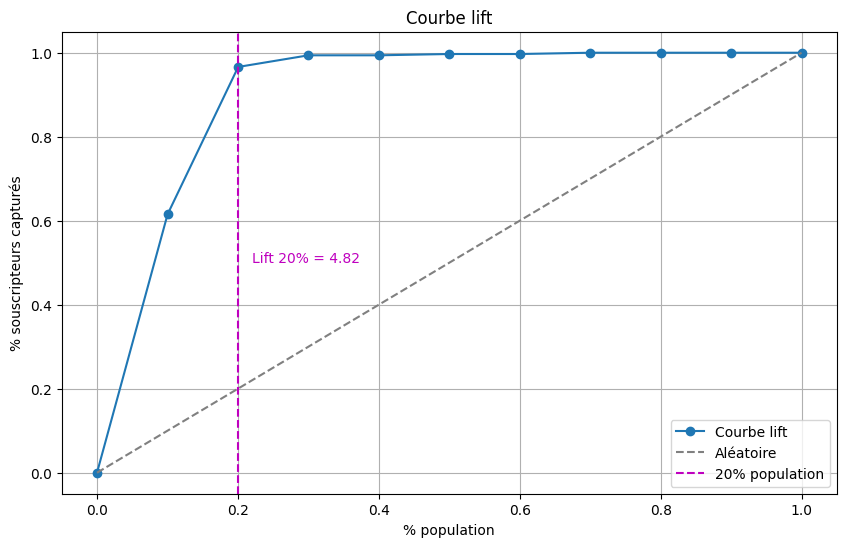

segment  sum_y_true  count  cum_sub   cum_pop  perc_sub_capt_relatif  \
0        -1           0      0        0  0.000000                    NaN   
1         0         200    203      200  0.100197               0.985222   
2         1         114    203      314  0.200395               0.773399   
3         2           9    202      323  0.300099               0.531250   
4         3           0    203      323  0.400296               0.398274   
5         4           1    202      324  0.500000               0.319842   
6         5           0    203      324  0.600197               0.266447   
7         6           1    202      325  0.699901               0.229196   
8         7           0    203      325  0.800099               0.200494   
9         8           0    202      325  0.899803               0.178278   
10        9           0    203      325  1.000000               0.160415   

    perc_sub_capt  
0        0.000000  
1        0.615385  
2        0.966154  
3        0.993846  
4        0.993846  
5        0.996923  
6        0.996923  
7        1.000000  
8        1.000000  
9        1.000000  
10       1.000000

In [72]:
model_analyzer.create_lift_table()

In [243]:
from joblib import dump, load

dump(gb_opt, 'GB_F191.pkl')

['GB_F191.pkl']

In [136]:
optuna.visualization.plot_param_importances(study)

In [137]:
optuna.visualization.plot_optimization_history(study)

# 5. Analysis of misclassification errors <a class="anchor" id="chapter5"></a>
[Up](#up)

In [75]:
# On réutilise les préciction au nouveau seuil
df_recup = pd.DataFrame({'y_pred' : y_pred_xgb, 'true': y_test})

In [78]:
X_test

CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
9242  720943308            47      M                3        Graduate   
7036  710879283            51      M                1     High School   
914   787800108            55      M                2         College   
9681  789200208            40      F                4      Uneducated   
9026  711332883            62      M                1     High School   
...         ...           ...    ...              ...             ...   
5335  718926258            37      F                1     High School   
4531  712723608            44      F                3      Uneducated   
5129  716739258            43      F                4         Unknown   
6714  715395933            44      F                3         College   
8014  769662033            45      F                2         College   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9242         Single     $60K - $80K        Silver              36   
7036        Married  Less than $40K          Blue              41   
914         Married    $80K - $120K          Blue              45   
9681        Married         Unknown          Blue              29   
9026         Single     $60K - $80K          Blue              46   
...             ...             ...           ...             ...   
5335         Single         Unknown          Blue              28   
4531        Unknown  Less than $40K          Blue              36   
5129         Single  Less than $40K          Blue              33   
6714        Unknown         Unknown          Blue              35   
8014        Unknown  Less than $40K          Blue              29   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9242                         1                       1                      2   
7036                         3                       4                      3   
914                          5                       1                      2   
9681                         2                       3                      3   
9026                         2                       3                      3   
...                        ...                     ...                    ...   
5335                         4                       3                      2   
4531                         6                       2                      4   
5129                         5                       2                      4   
6714                         5                       2                      2   
8014                         2                       2                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9242       30498.0                 1990          28508.0   
7036        1438.3                    0           1438.3   
914         2929.0                 2431            498.0   
9681        3326.0                 2181           1145.0   
9026        7547.0                 2477           5070.0   
...            ...                  ...              ...   
5335        2458.0                  642           1816.0   
4531        1713.0                    0           1713.0   
5129        1438.3                    0           1438.3   
6714       11238.0                 2336           8902.0   
8014        1438.3                    0           1438.3   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9242                 0.839            16202             120   
7036                 0.623             4312              81   
914                  1.632             1903              39   
9681                 0.827            13583             110   
9026                 1.021             5294              73   
...                    ...              ...             ...   
5335                 0.666             4627              90   
4531                 0.678             3999              66   
5129                 0.679             

In [79]:
liste_clients = pd.concat([X_test.reset_index(drop=True), df_recup.reset_index(drop=True)], axis=1).sort_values(by='y_pred', ascending=False)

In [80]:
bien_classés = liste_clients[(liste_clients["y_pred"] == True) & (liste_clients["true"] == 1)] 

In [83]:
FN = liste_clients[(liste_clients["y_pred"] == False) & (liste_clients["true"] == 1)] 

In [82]:
FP = liste_clients[(liste_clients["y_pred"] == True) & (liste_clients["true"] == 0)] 

In [84]:
testset_attr = testset[testset["Attrition_Flag"] == "Attrited Customer"]

In [85]:
columns = ['Contacts_Count_12_mon', 'Total_Relationship_Count',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal',
       'Total_Trans_Ct', 'Total_Trans_Amt', 'Months_Inactive_12_mon',
       'Customer_Age']

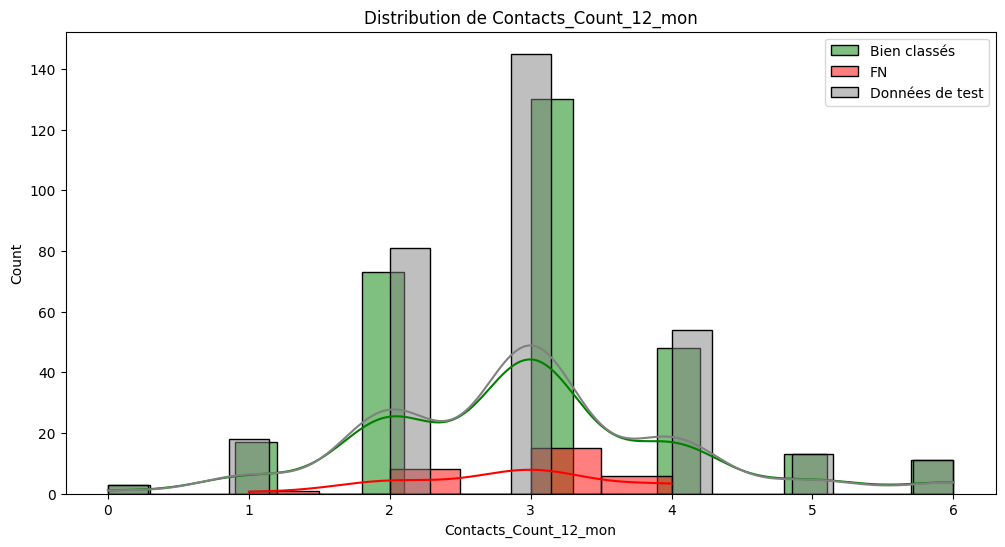

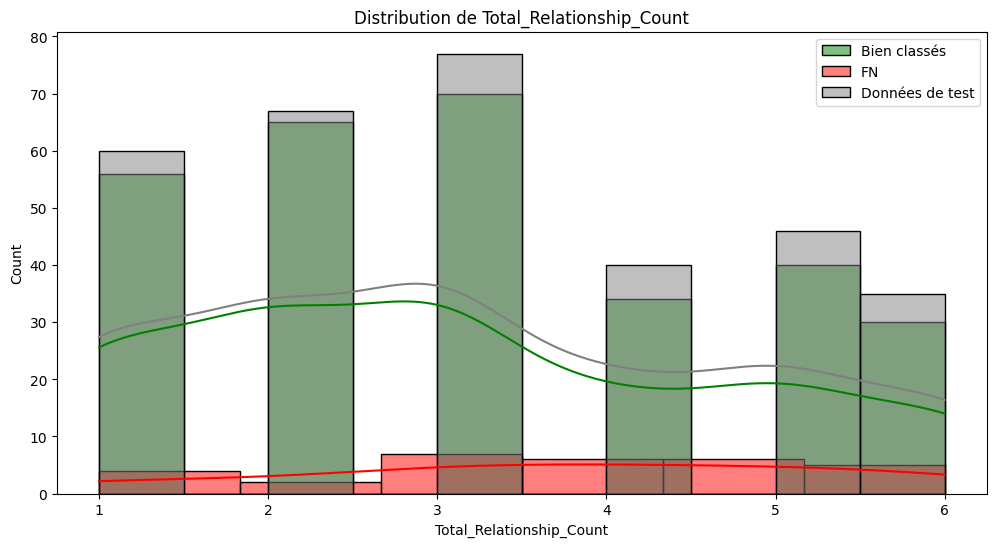

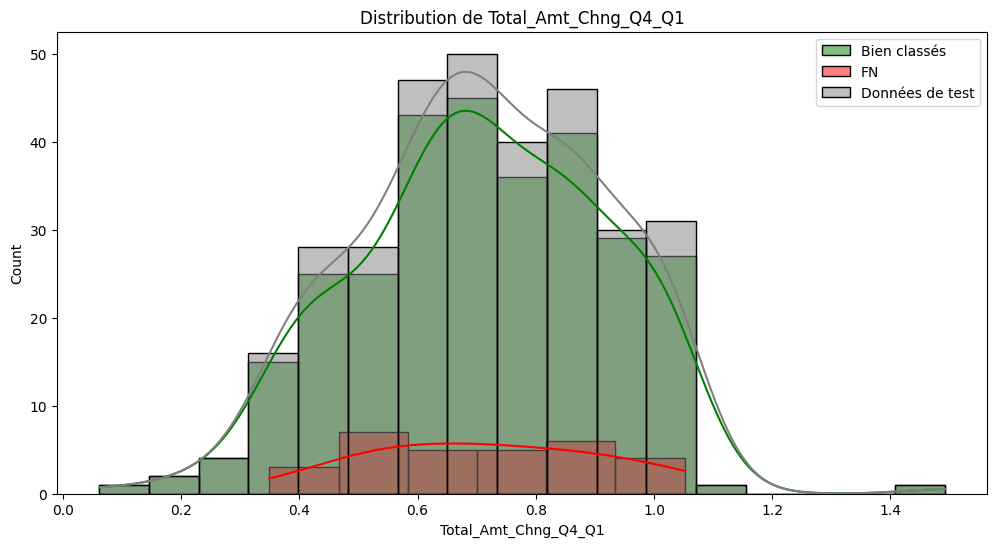

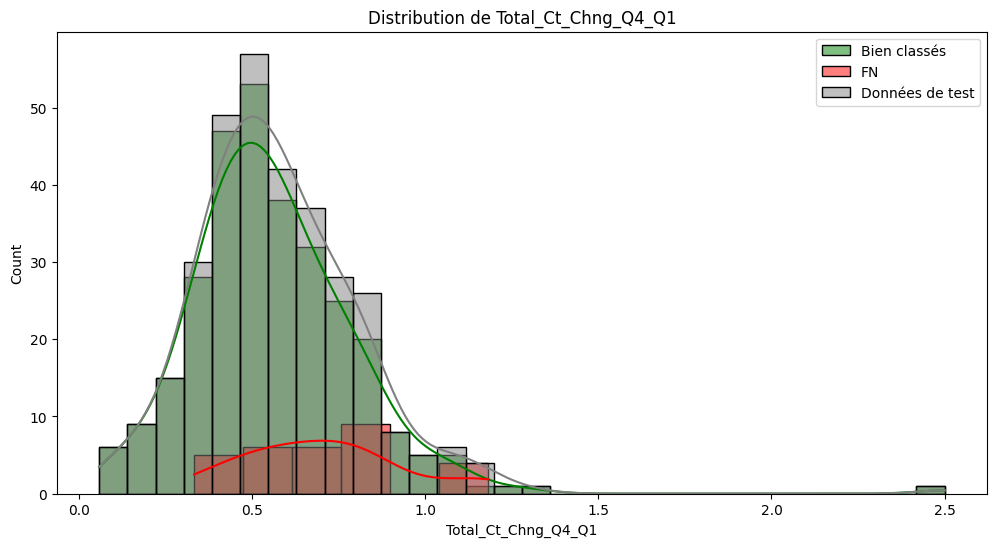

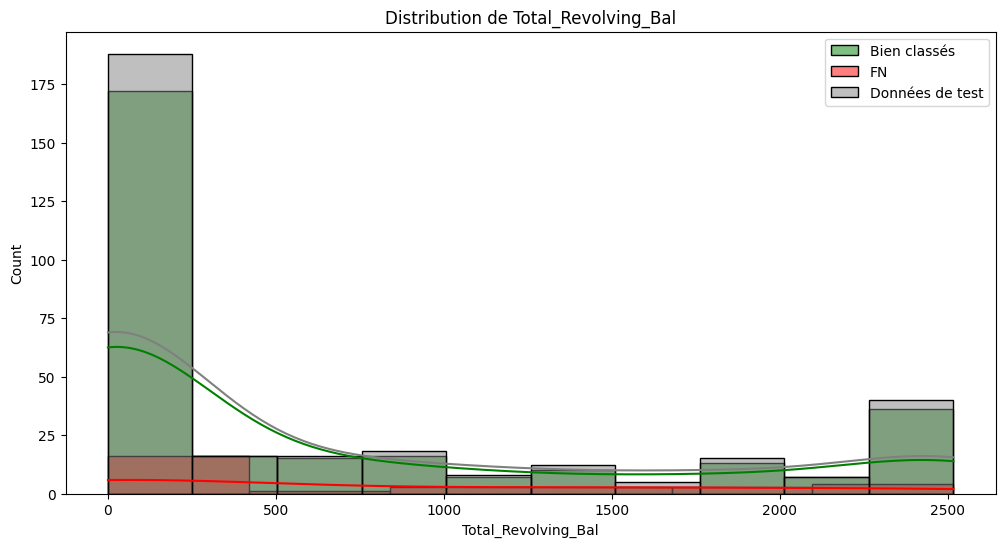

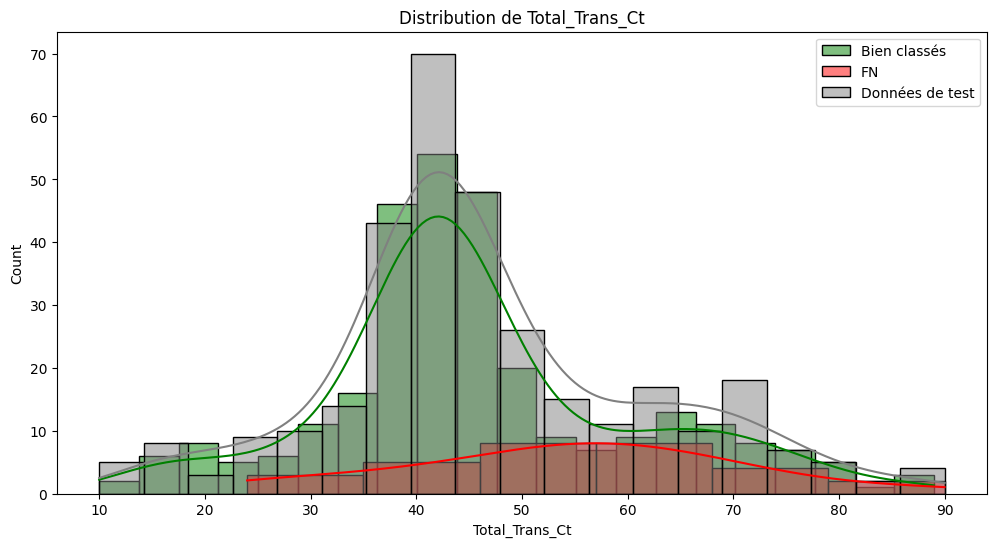

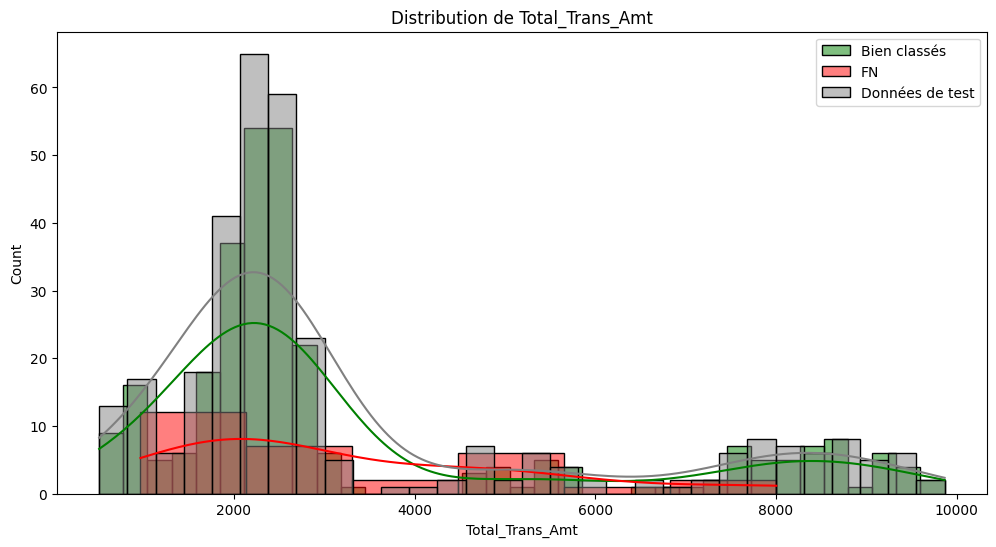

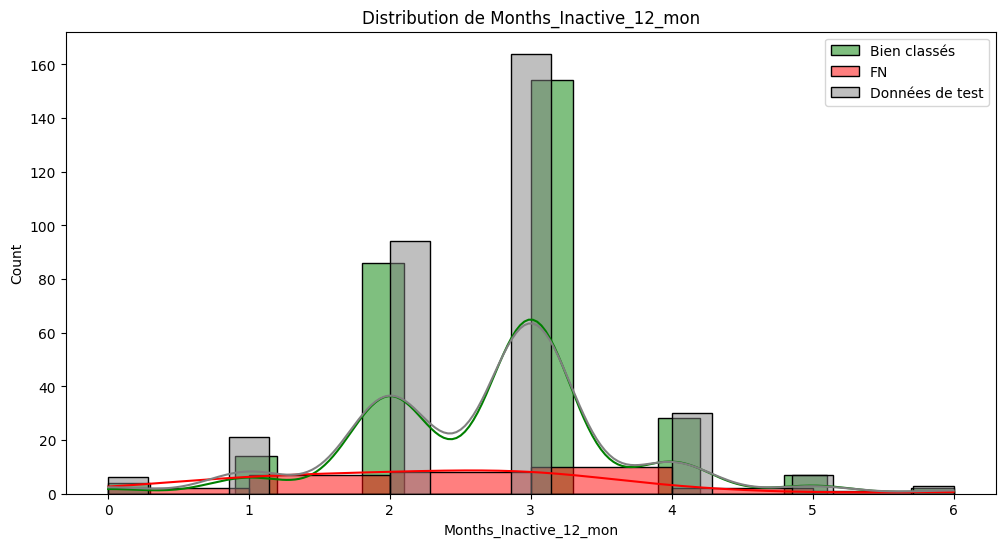

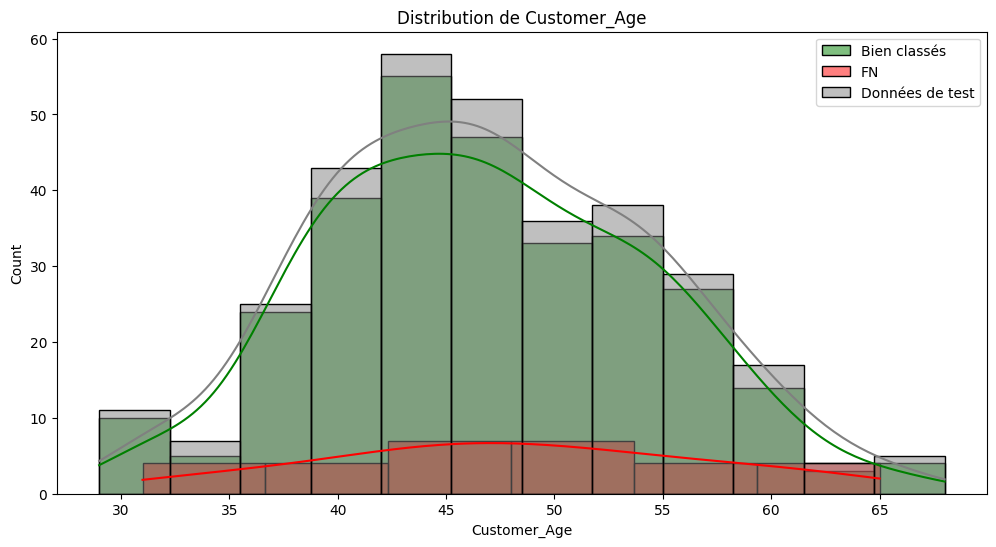

In [86]:
for col in columns:
    plt.figure(figsize=(12, 6))
    
    # Histogramme des clients mal classés
    sns.histplot(bien_classés[col], color='green', label='Bien classés',  kde=True)
    
    # Histogramme des clients bien classés
    sns.histplot(FN[col], color='red', label='FN', kde=True)

    # Histogramme des clients bien classés
    sns.histplot(testset_attr[col], color='grey', label='Données de test',  kde=True)
    
    plt.title(f'Distribution de {col}')
    plt.legend()
    plt.show()

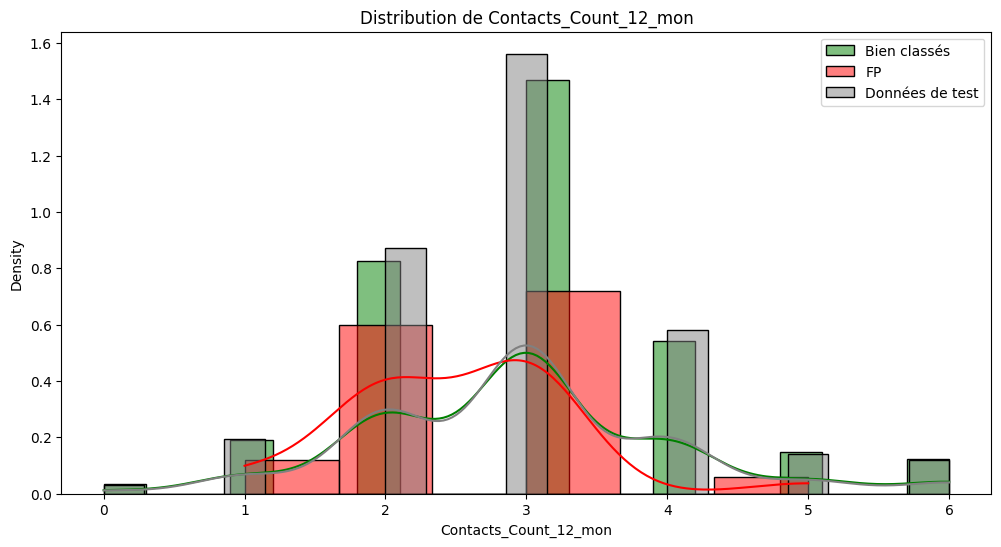

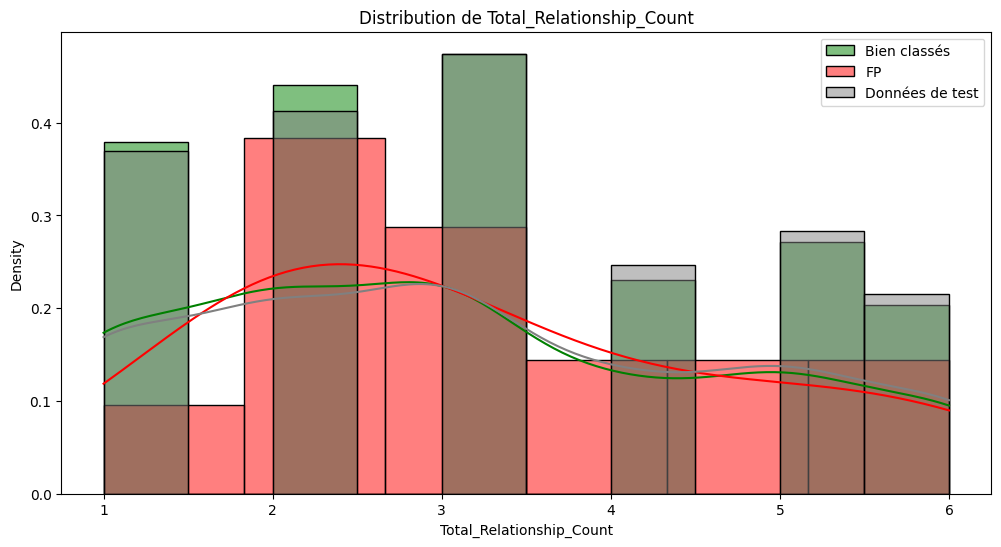

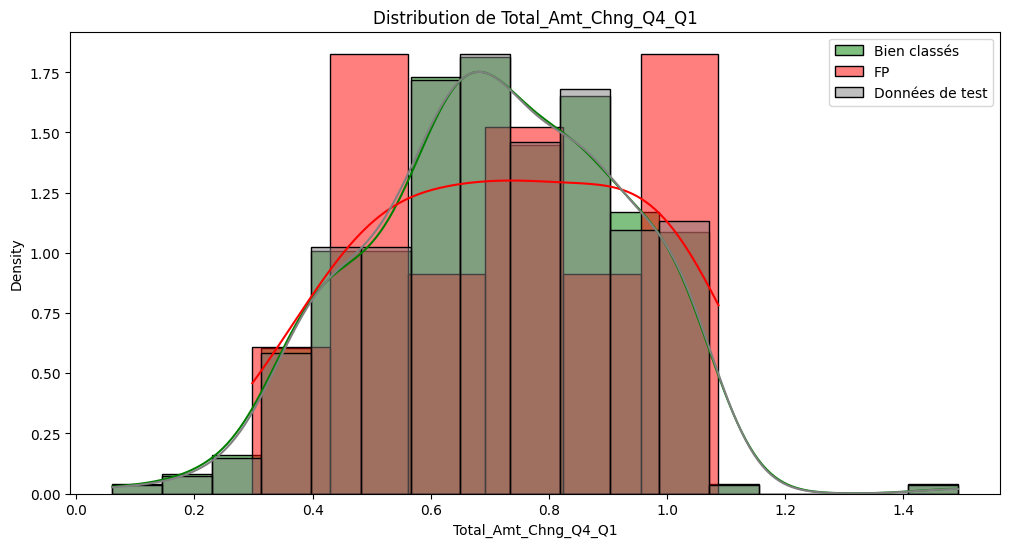

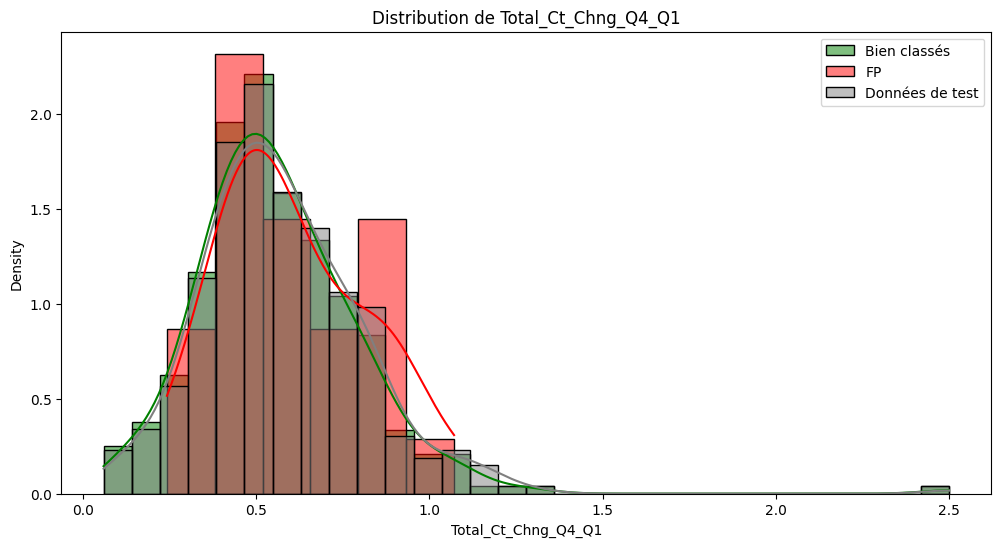

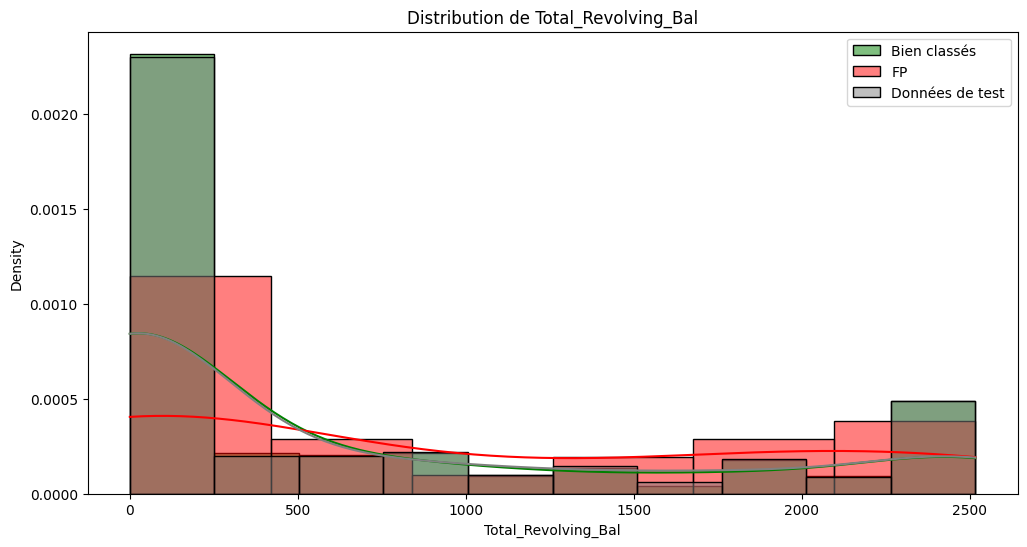

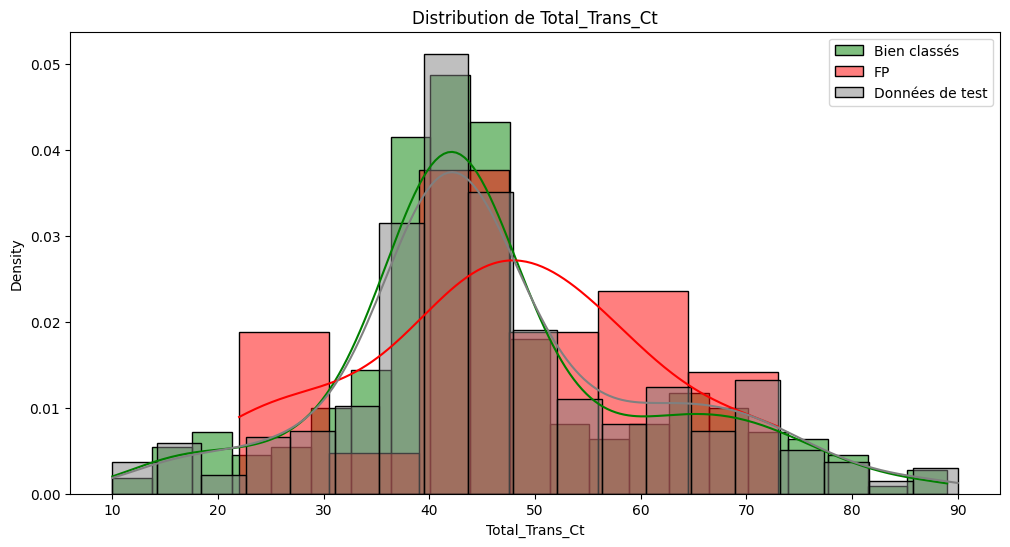

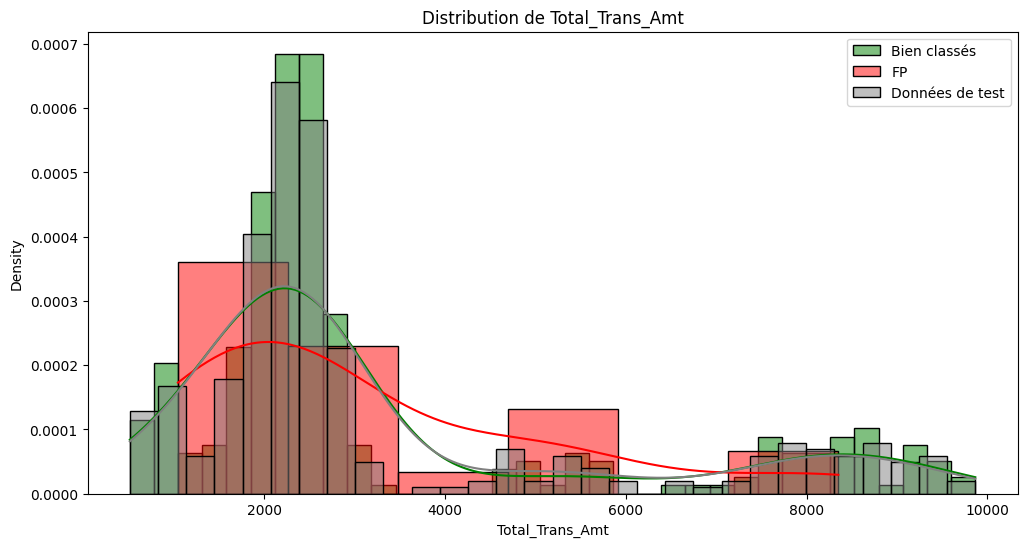

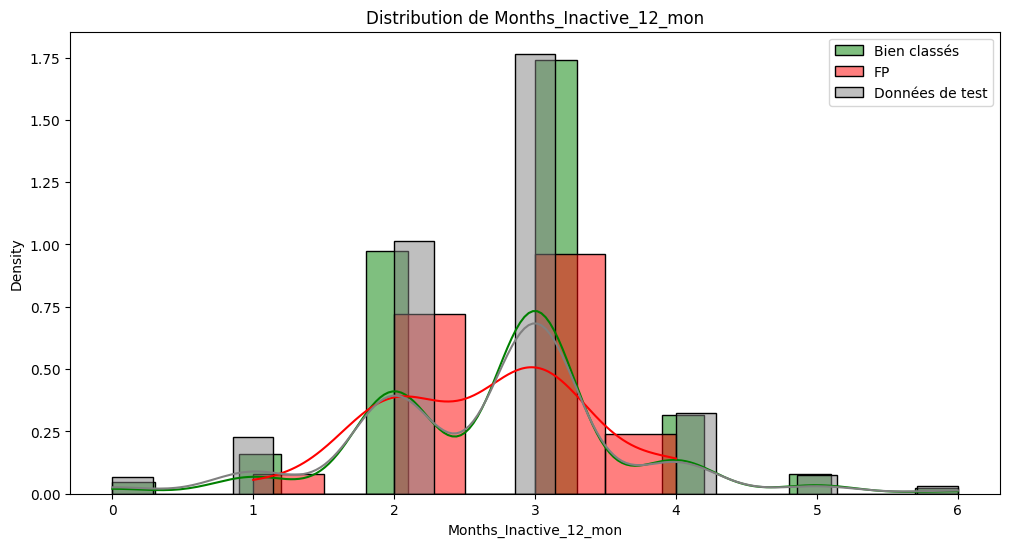

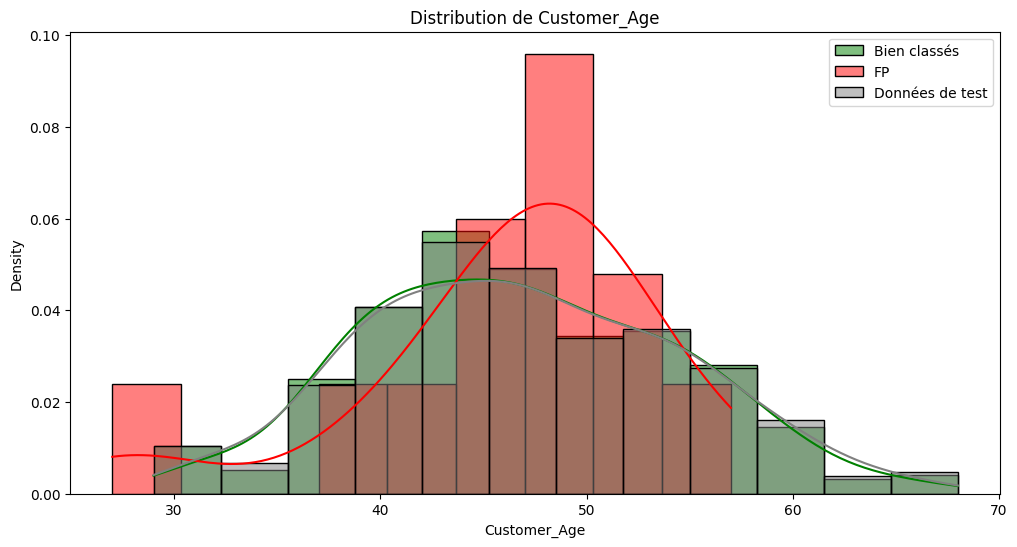

In [87]:
for col in columns:
    plt.figure(figsize=(12, 6))
    
    # Histogramme des clients mal classés
    sns.histplot(bien_classés[col], color='green', label='Bien classés', stat="density", kde=True)
    
    # Histogramme des clients bien classés
    sns.histplot(FP[col], color='red', label='FP', stat="density", kde=True)

    # Histogramme des clients bien classés
    sns.histplot(testset_attr[col], color='grey', label='Données de test', stat="density", kde=True)
    
    plt.title(f'Distribution de {col}')
    plt.legend()
    plt.show()

# 6. Conclusion <a class="anchor" id="chapter6"></a>
[Up](#up)

Malgré la présence d'outliers et quelques erreurs de mauvais classement, le modèle affiche de très bonnes performances globales. Les métriques de performance restent élevées, indiquant des prédictions fiables pour la majorité des clients.

La suppression des outliers pourrait améliorer la robustesse du modèle, mais dans notre cas, avec une base de données de 10 000 clients, cela risque de faire perdre des informations importantes, notamment si ces outliers représentent des segments de clientèle spécifiques. Par conséquent, nous avons choisi de conserver les outliers pour préserver la représentativité complète des données.

En conclusion, notre modèle est performant et la conservation des outliers assure une représentation fidèle et complète de notre clientèle.